# Credit Risk Prediction

Importing dataset from UCI 

In [96]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 

In [97]:
# metadata 
print(statlog_german_credit_data.metadata) 

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [98]:
# variable information 
print(statlog_german_credit_data.variables) 

           name     role         type     demographic  \
0    Attribute1  Feature  Categorical            None   
1    Attribute2  Feature      Integer            None   
2    Attribute3  Feature  Categorical            None   
3    Attribute4  Feature  Categorical            None   
4    Attribute5  Feature      Integer            None   
5    Attribute6  Feature  Categorical            None   
6    Attribute7  Feature  Categorical           Other   
7    Attribute8  Feature      Integer            None   
8    Attribute9  Feature  Categorical  Marital Status   
9   Attribute10  Feature  Categorical            None   
10  Attribute11  Feature      Integer            None   
11  Attribute12  Feature  Categorical            None   
12  Attribute13  Feature      Integer             Age   
13  Attribute14  Feature  Categorical            None   
14  Attribute15  Feature  Categorical           Other   
15  Attribute16  Feature      Integer            None   
16  Attribute17  Feature  Categ

In [99]:
# entire data 
display(statlog_german_credit_data.data) 

{'ids': None,
 'features':     Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
 0          A11           6        A34        A43        1169        A65   
 1          A12          48        A32        A43        5951        A61   
 2          A14          12        A34        A46        2096        A61   
 3          A11          42        A32        A42        7882        A61   
 4          A11          24        A33        A40        4870        A61   
 ..         ...         ...        ...        ...         ...        ...   
 995        A14          12        A32        A42        1736        A61   
 996        A11          30        A32        A41        3857        A61   
 997        A14          12        A32        A43         804        A61   
 998        A11          45        A32        A43        1845        A61   
 999        A12          45        A34        A41        4576        A62   
 
     Attribute7  Attribute8 Attribute9 Attribute10  Attribut

In [100]:
# predctors
df_features = statlog_german_credit_data.data.features
display(df_features) 

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [101]:
# target
df_target = statlog_german_credit_data.data.targets
display(df_target)

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


In [102]:
import scipy.stats as stats 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import textwrap
import seaborn as sns
import warnings


import statsmodels.api as sm


#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression #to build the model
from sklearn.tree import DecisionTreeClassifier#to build the model


The dataset has all the variables in codenames, whose meanings are mentioned in the metadata. The codenames are replaced with their original meanings, so that the variables can be observed and analysed using their original meanings.

In [103]:
var_info = statlog_german_credit_data.metadata.additional_info.variable_info
var_desc = [i.strip() for i in var_info.split('\r\n') if len(i)>0]
var_desc = [i for i in var_desc if not (i[0]!='A')|(i.startswith('Attribute'))]
var_keys = [i.split(':')[0].strip() for i in var_desc if ':' in i]
var_values = [i.split(':')[1].strip() for i in var_desc if ':' in i]
var_dict = dict(zip(var_keys, var_values))
col_dict = dict(zip(statlog_german_credit_data.variables['name'],statlog_german_credit_data.variables['description']))
df_features.rename(columns=col_dict, inplace=True)
display(df_features.replace(var_dict))

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\4034799653.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.rename(columns=col_dict, inplace=True)


,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,... < 0 DM,6,critical account/ other credits existing (not...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,no checking account,12,critical account/ other credits existing (not...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male,guarantor,4,if not A121,45,none,for free,1,skilled employee / official,2,none,yes
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,... < 100 DM,4 <= ... < 7 years,3,female,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,... < 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male,none,4,if not A121,40,none,own,1,management/ self-employed/,1,"yes, registered under the customers name",yes
997,no checking account,12,existing credits paid back duly till now,radio/television,804,... < 100 DM,.. >= 7 years,4,male,none,4,if not A121/A122,38,none,own,1,skilled employee / official,1,none,yes
998,... < 0 DM,45,existing credits paid back duly till now,radio/television,1845,... < 100 DM,1 <= ... < 4 years,4,male,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [104]:
df_target.rename(columns={'class':'Risk'}, inplace=True)
display(df_target.replace({1:'Good', 2:'Bad'}))

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\1301875808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target.rename(columns={'class':'Risk'}, inplace=True)


,Risk
0,Good
1,Bad
2,Good
3,Good
4,Bad
...,...
995,Good
996,Good
997,Good
998,Bad


In [105]:
# Concat to create final dataset
df_credit = pd.concat([df_features.replace(var_dict), df_target.replace({1:'Good', 2:'Bad'})], axis=1)
display(df_credit)

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Risk
0,... < 0 DM,6,critical account/ other credits existing (not...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,Good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad
2,no checking account,12,critical account/ other credits existing (not...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male,guarantor,...,if not A121,45,none,for free,1,skilled employee / official,2,none,yes,Good
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,... < 100 DM,4 <= ... < 7 years,3,female,none,...,real estate,31,none,own,1,unskilled - resident,1,none,yes,Good
996,... < 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male,none,...,if not A121,40,none,own,1,management/ self-employed/,1,"yes, registered under the customers name",yes,Good
997,no checking account,12,existing credits paid back duly till now,radio/television,804,... < 100 DM,.. >= 7 years,4,male,none,...,if not A121/A122,38,none,own,1,skilled employee / official,1,none,yes,Good
998,... < 0 DM,45,existing credits paid back duly till now,radio/television,1845,... < 100 DM,1 <= ... < 4 years,4,male,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes,Bad


In [106]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration                                                  1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

*Observation:*

- There are *no missing values* in the dataset.  
- *Risk* is the target variable.
- There are 13 categorical variables and 7 numeric variables among the features.

# Problem Statement
- Predict Good Risk / Bad Risk
- Predict whether a person will default loan or not

There are 3 persons with age 20 and presently employed since >=7 years 

Seperate the categorical variables and numeric variables

In [107]:
category_cols = [i for i in df_credit.columns if df_credit[i].dtype==object]
numeric_cols = [i for i in df_credit.columns if df_credit[i].dtype!=object]

# EDA

Visualising the distribution for the numeric variables, along with their summary statistics

Observing the distribution of each object variable

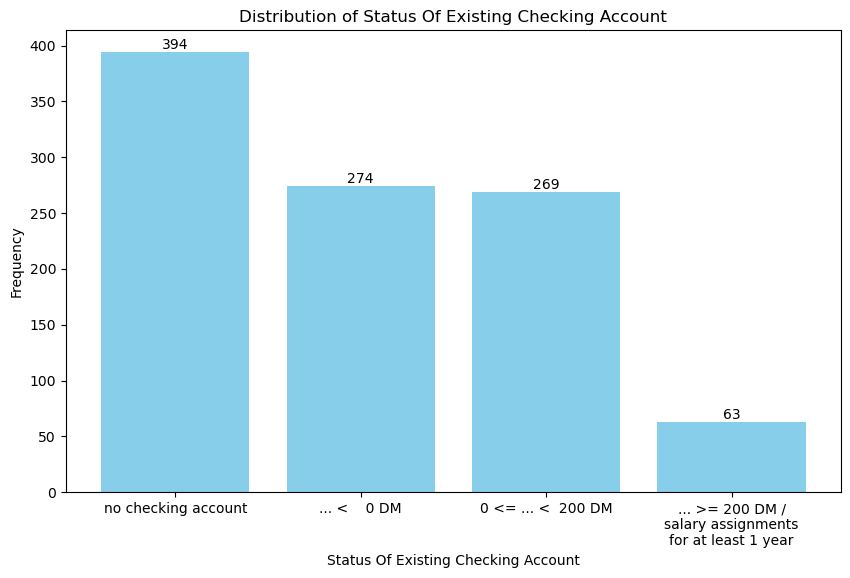

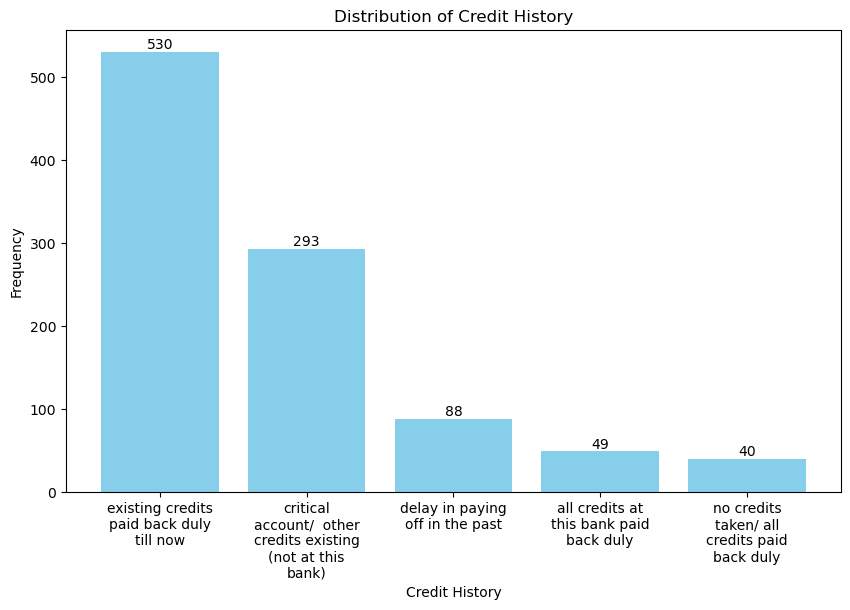

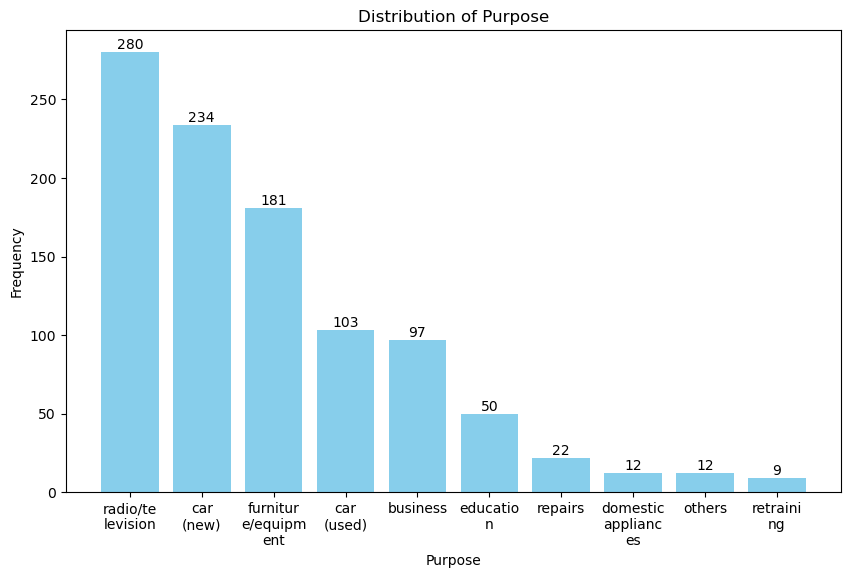

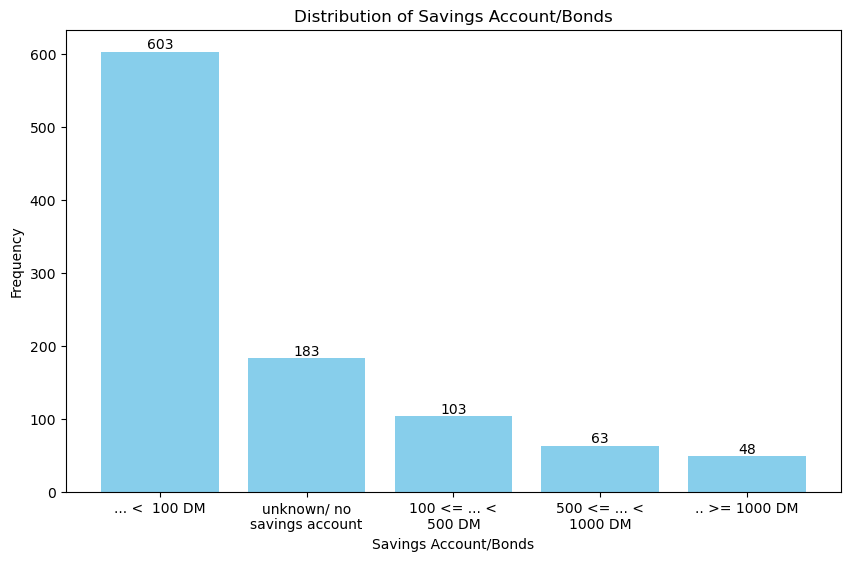

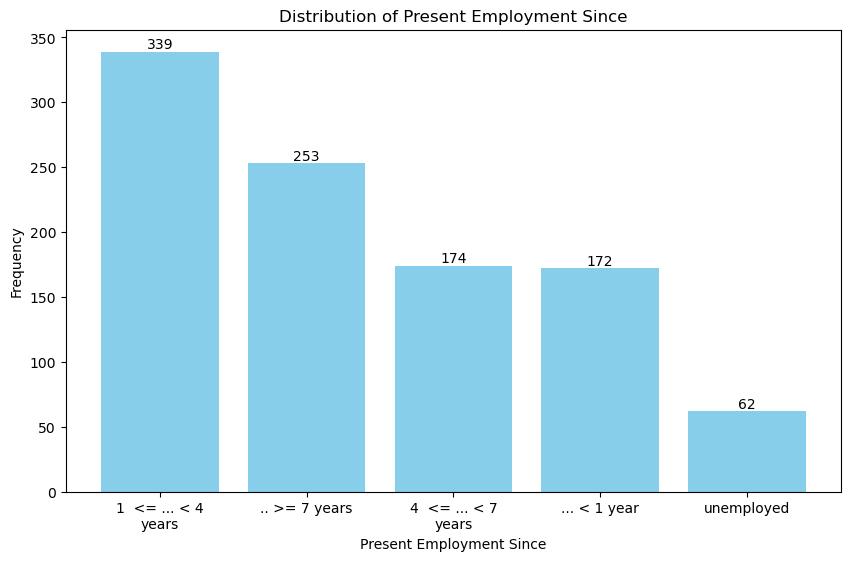

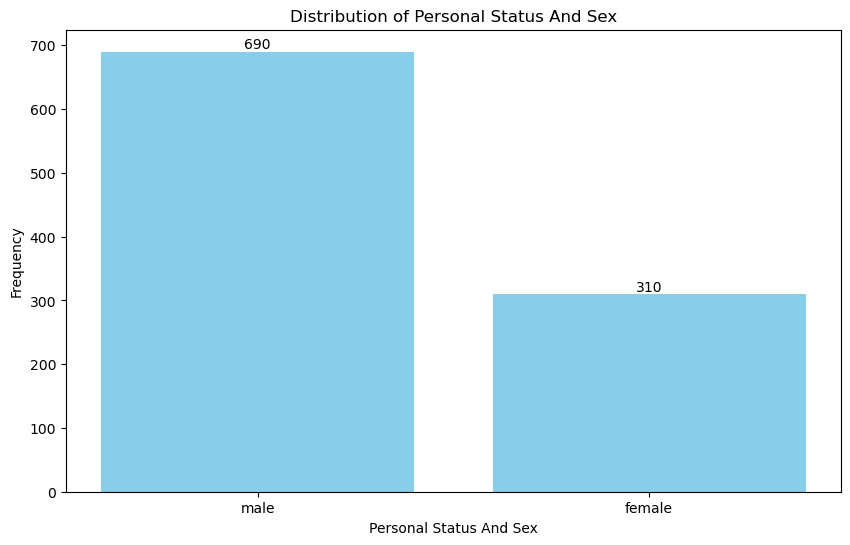

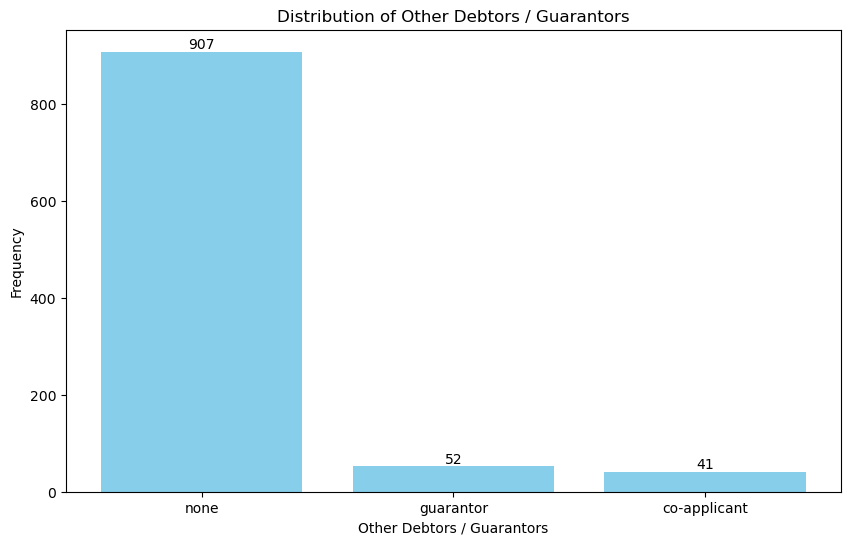

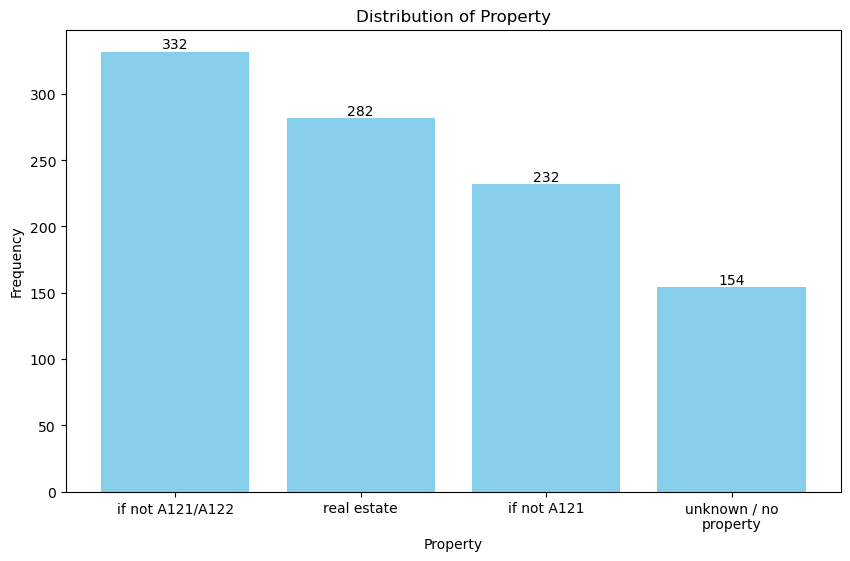

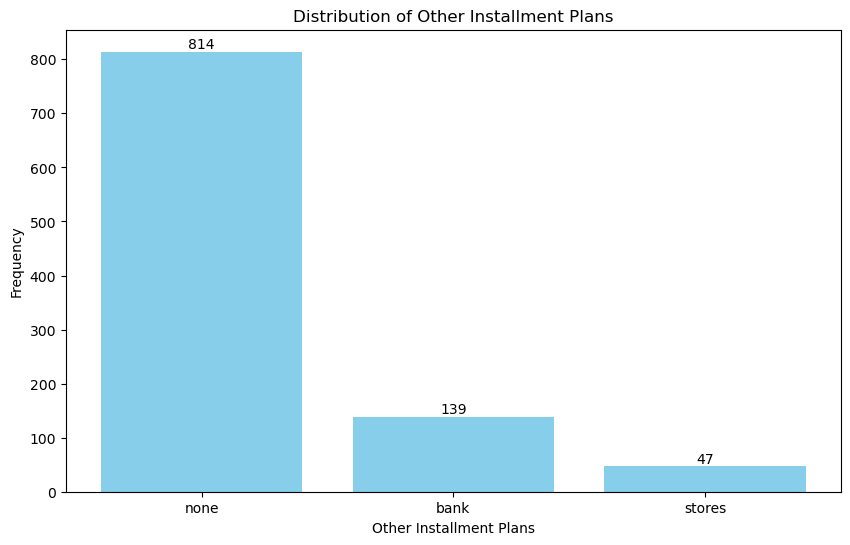

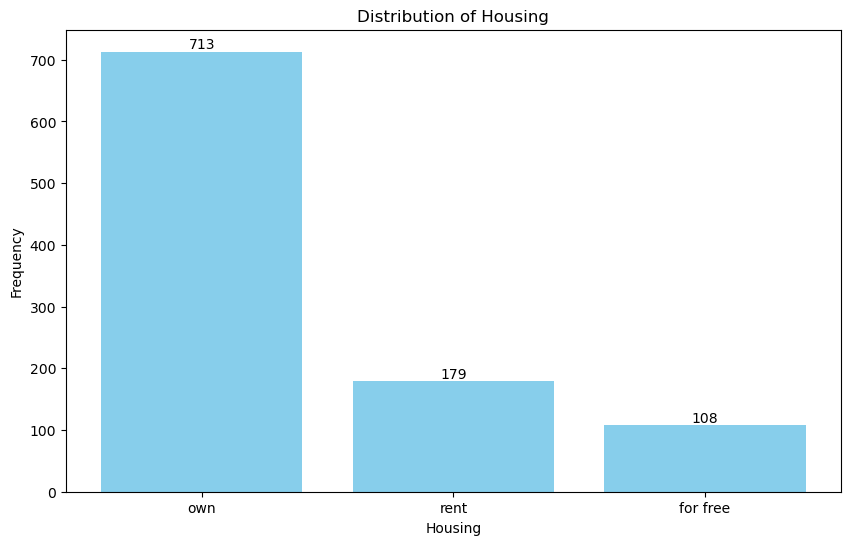

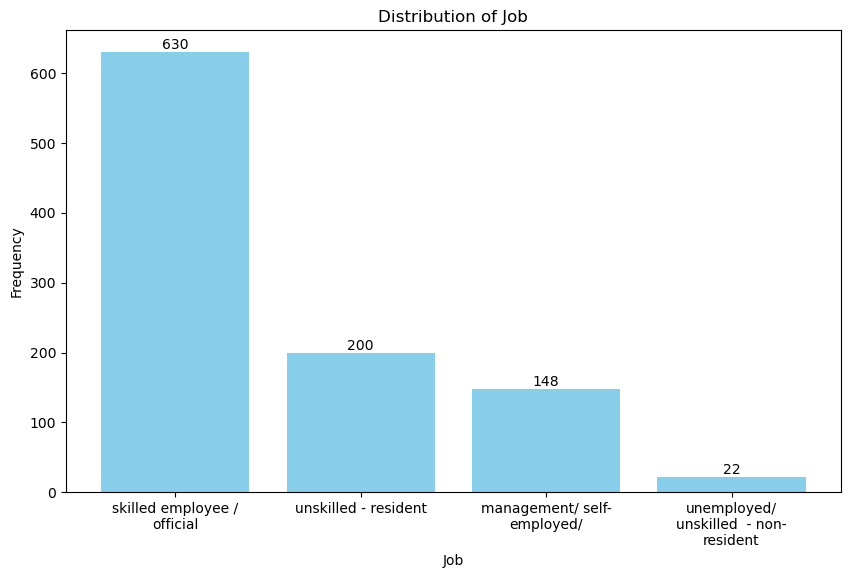

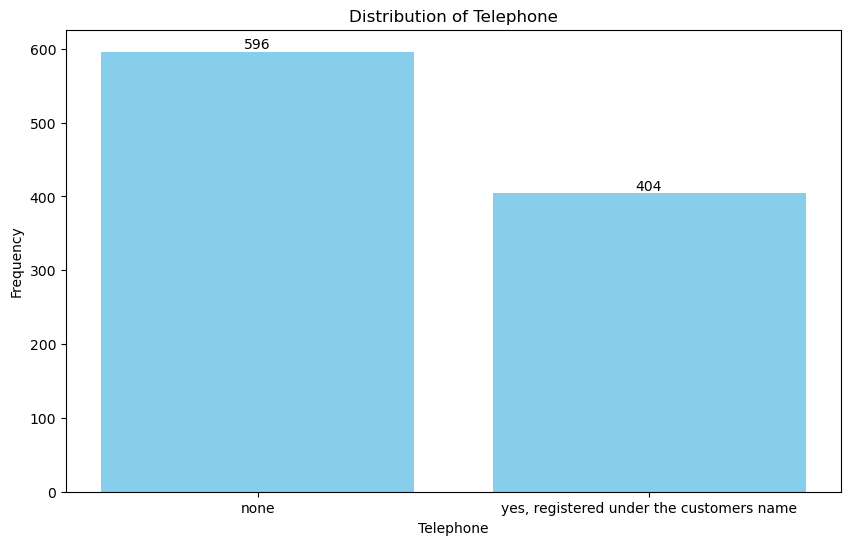

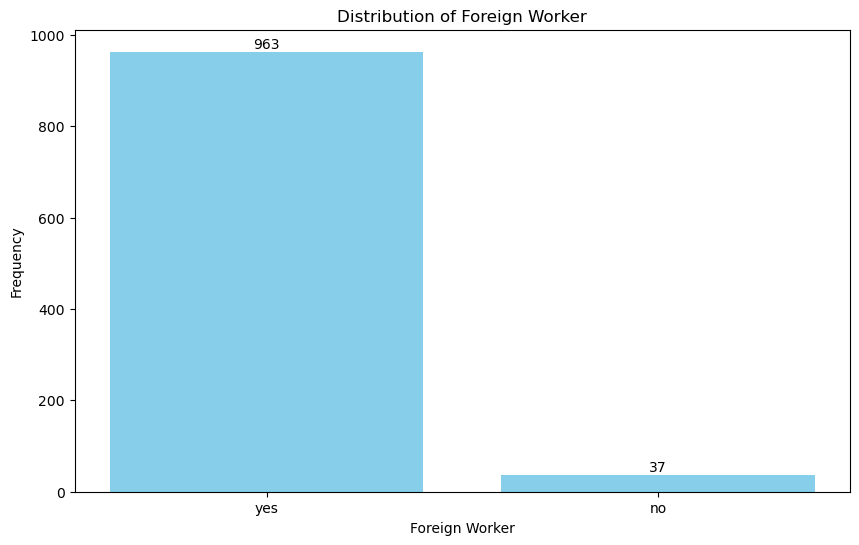

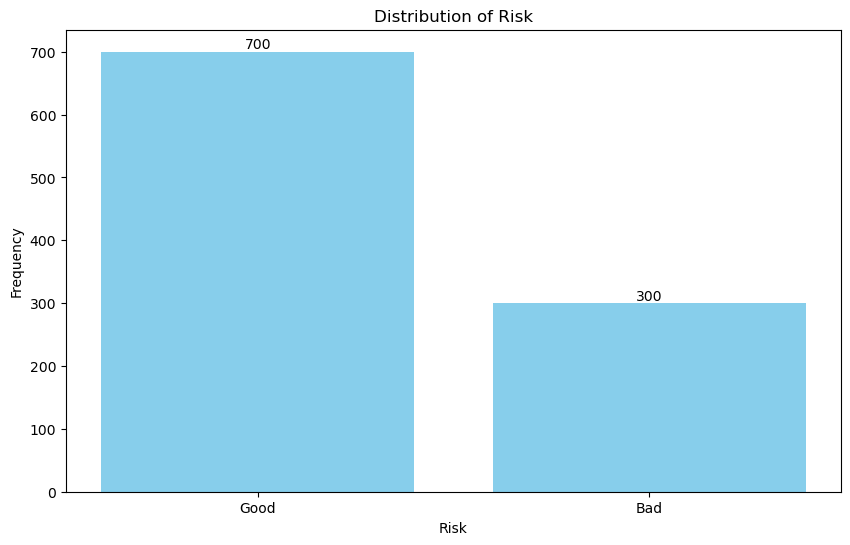

In [108]:
for i in category_cols:

    # Count the occurrences of each unique value
    counts = df_credit[i].value_counts()

    # Calculate the approximate width of each bar in characters
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = fig.get_figwidth() / len(counts)
    plt.close(fig)

    # Define a function to wrap text based on bar width
    def wrap_labels(labels, bar_width):
        wrapped_labels = []
        for label in labels:
            # Estimate the number of characters that fit in the bar width
            max_characters = int(bar_width * 8)  # Adjust multiplier as needed
            wrapped_labels.append(textwrap.fill(label, max_characters))
        return wrapped_labels

    # Wrap the labels
    wrapped_labels = wrap_labels(counts.index, bar_width)

    # Plotting the bar graph
    plt.figure(figsize=(10, 6))
    bars = plt.bar(wrapped_labels, counts.values, color='skyblue')

    # Adding count numbers above the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom', ha='center')  # ha: horizontal alignment

    # Adding title and labels
    plt.title(f'Distribution of {i.title()}')
    plt.xlabel(i.title())
    plt.ylabel('Frequency')

    # Rotate the x-axis labels for better readability if needed
    plt.xticks(rotation=0)

    # Display the plot
    plt.show()


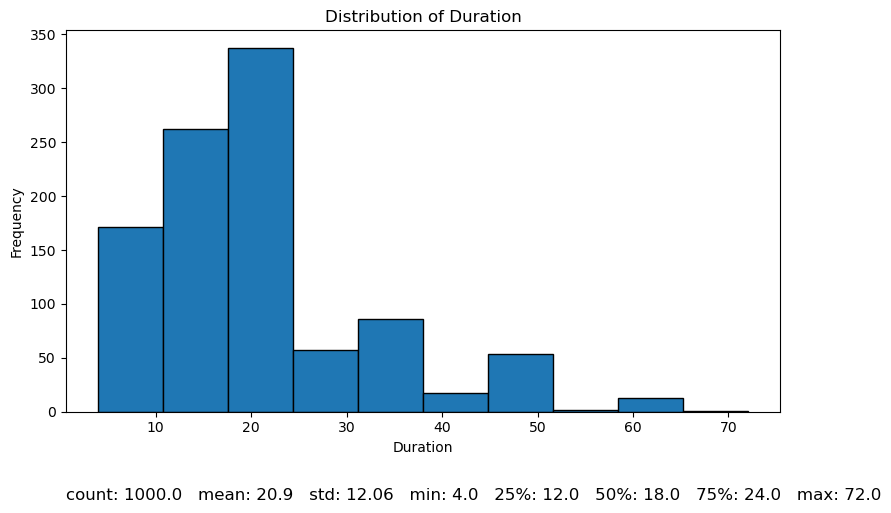

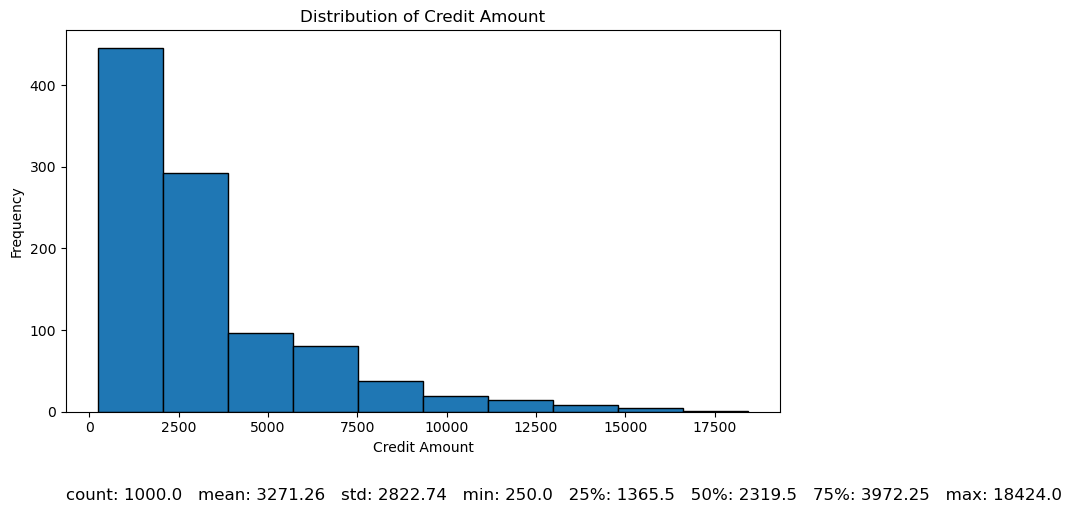

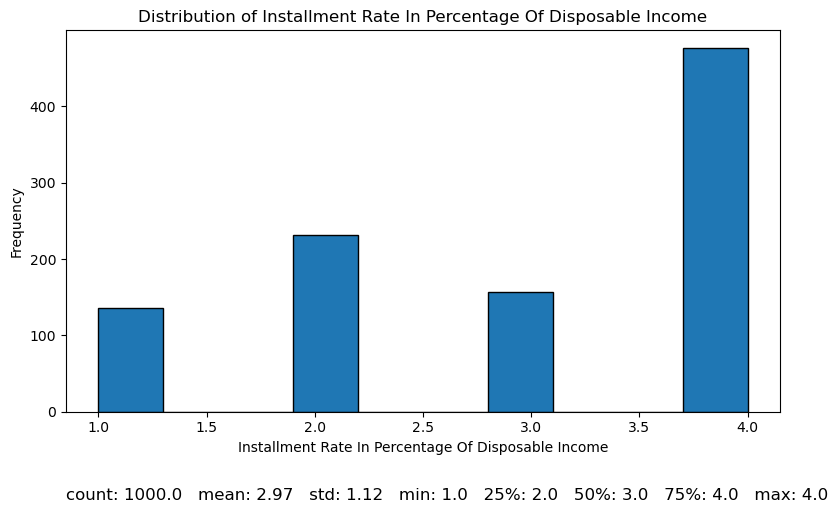

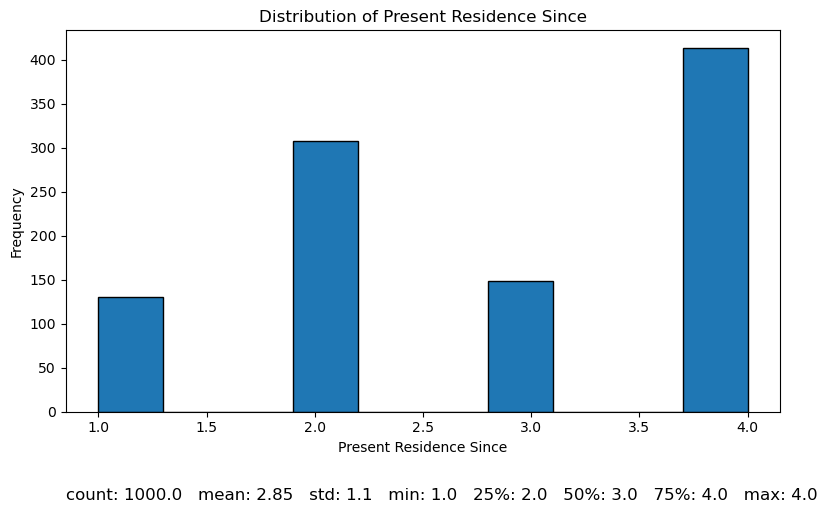

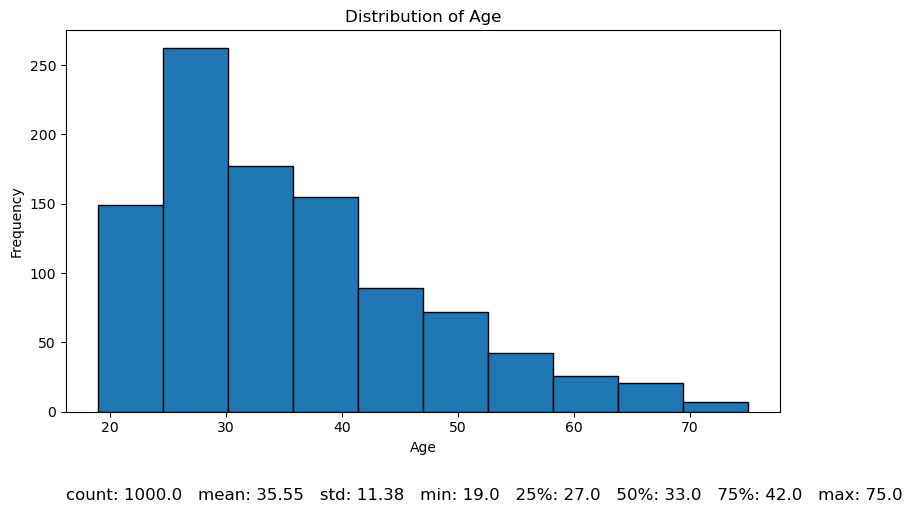

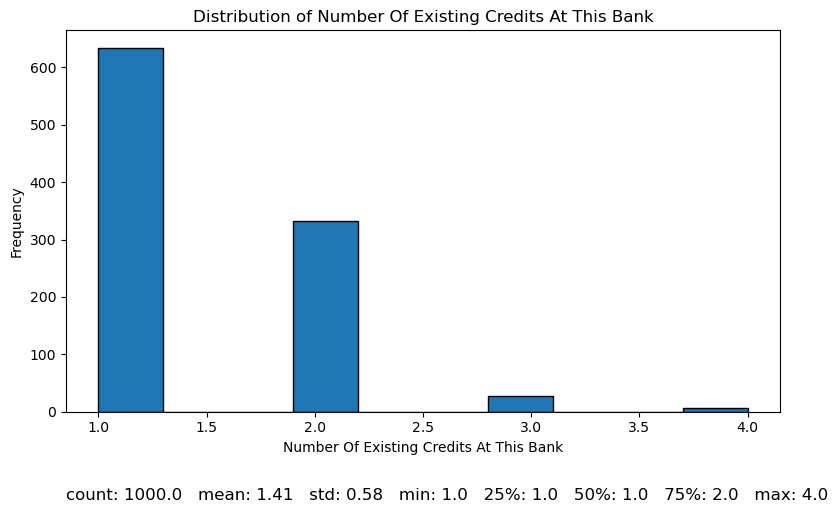

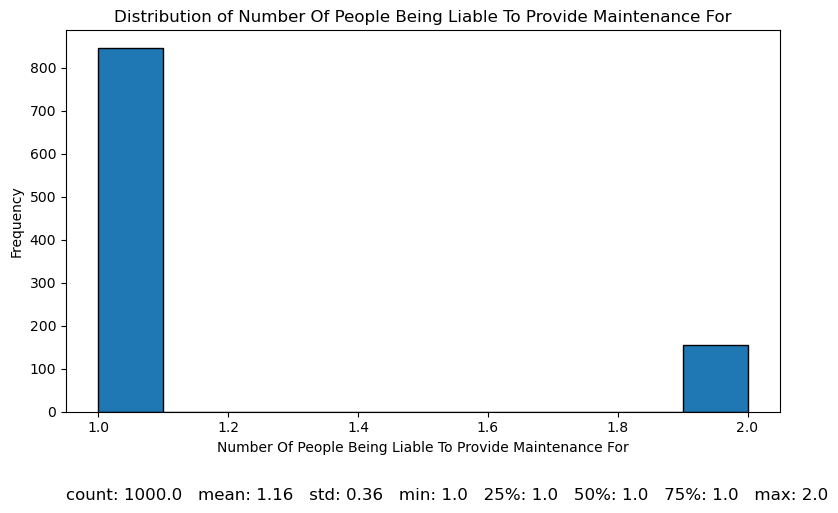

In [109]:


for i in numeric_cols:

    # Plot the histogram
    plt.figure(figsize=(8,5))
    plt.hist(df_credit[i], edgecolor='black')
    plt.title(f'Distribution of {i.title()}')
    plt.xlabel(i.title())
    plt.ylabel('Frequency')

    # Calculate summary statistics
    summary_stats = df_credit[[i]].describe()

    # Create summary statistics text
    summary_text = summary_stats.T.to_dict(orient='list')
    for i in summary_text:  summary_text[i] = summary_text[i][0]
    summary_text = '   '.join([f'{stat}: {round(summary_text[stat],2)}' for stat in summary_text])

    # Display summary statistics below the histogram
    plt.gcf().text(0, -0.2, summary_text, fontsize=12, va='top', ha='left', transform=plt.gca().transAxes)

    # Adjust layout to make room for summary statistics
    plt.tight_layout(rect=[0, 0.05, 1, 1])

    # Show the plot
    plt.show()


Check for outliers in the numeric variables

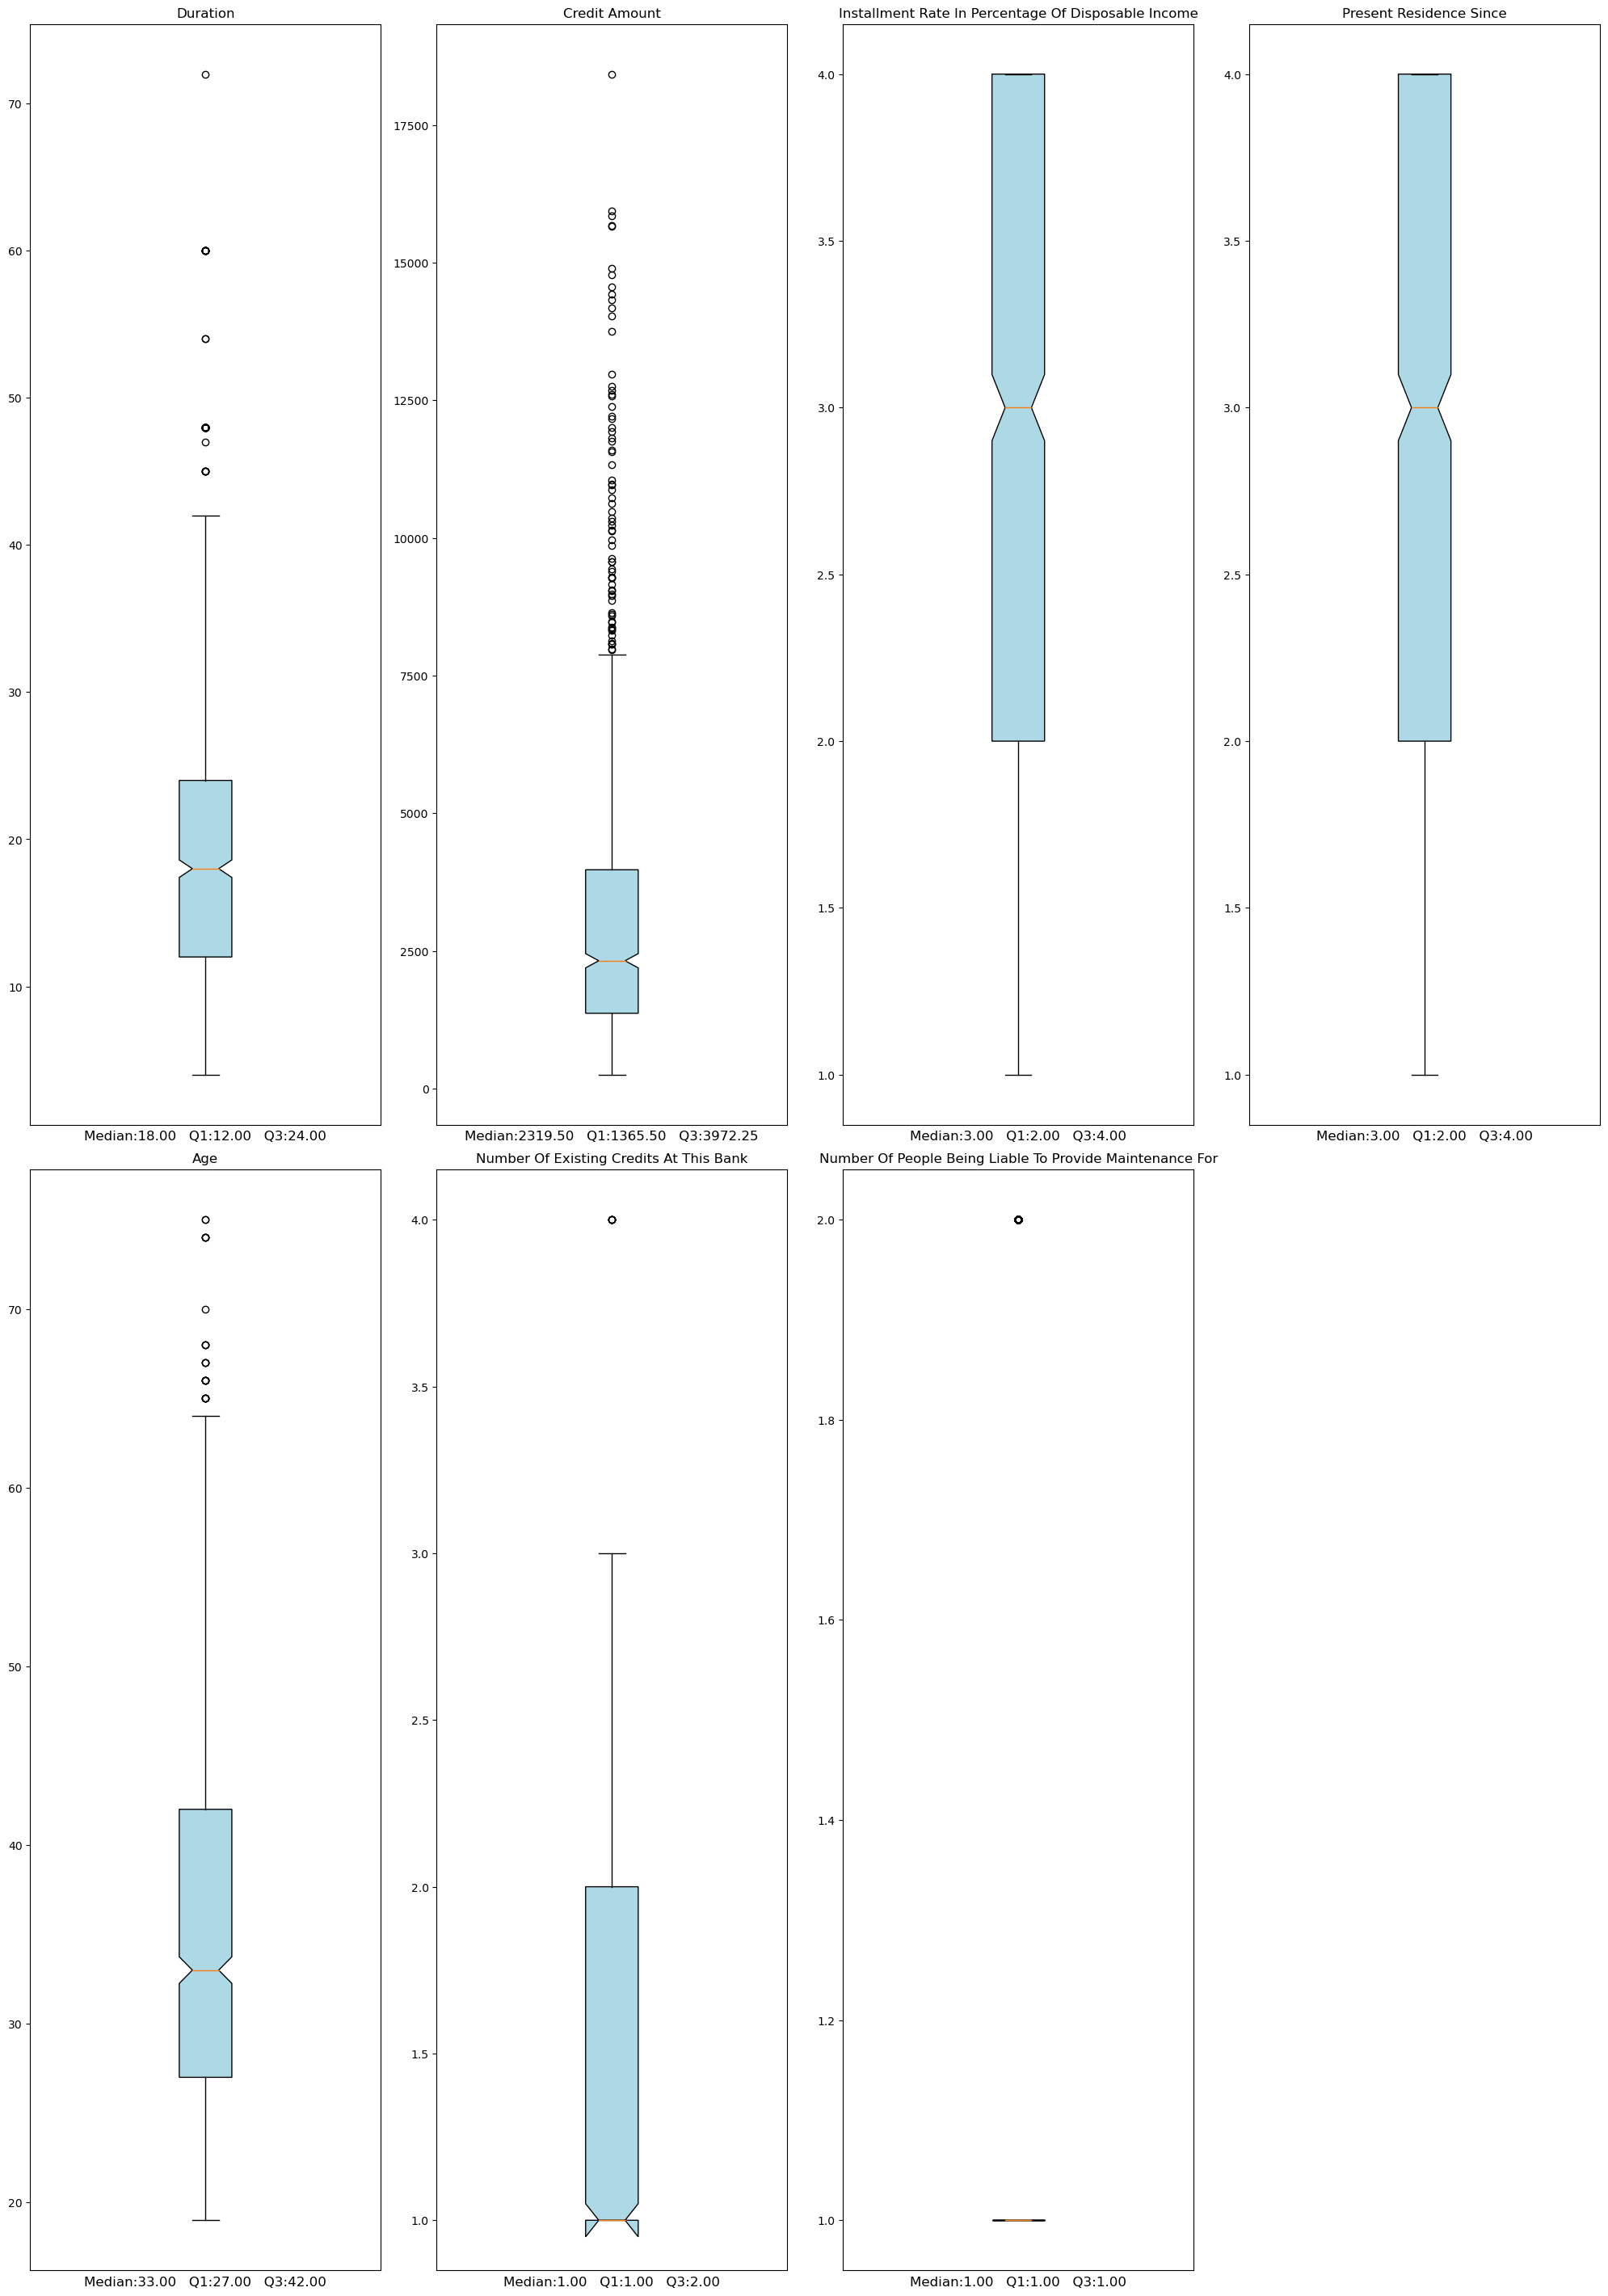

In [110]:
# Function to plot boxplot and add summary statistics
def plot_boxplot(ax, data, var):
    box = ax.boxplot(data, patch_artist=True, notch=True, vert=True)
    
    # Calculate summary statistics
    median, q1, q3 = data.median(), data.quantile(0.25), data.quantile(0.75)
    summary_text = f'Median:{median:.2f}   Q1:{q1:.2f}   Q3:{q3:.2f}'
    
    # Display summary statistics below the plot
    ax.text(0.5, -0.005, summary_text, fontsize=12, va='top', ha='center', transform=ax.transAxes)
    
    # Customize the boxplot appearance
    for patch in box['boxes']:  patch.set_facecolor('lightblue')
    
    # Set titles and ticks
    ax.set_xticks([])
    ax.set_title(var.title())


# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(20,30))
axs = axs.flatten() # Flatten the array of axes
for i, variable in enumerate(numeric_cols): plot_boxplot(axs[i], df_credit[variable], variable)



# Remove the unused subplot
fig.delaxes(axs[-1])

plt.tight_layout(rect=[0, 0.05, 1, 1])

# Display the plots
plt.show()

There are significant count of outliers for the variables "Duration", "Credit Amount" and "Age".
The "Age" variable is not to be associated with outliers, since there is no ideal age for taking credit.
This is some really extreme values in "Credit Amount" and "Duration". After identifying outliers, it can be decided whether to remove/treat them or not. In this case, it's not advisable to treat them as there will be outliers in real case scenario in terms of credit amount and credit duration, the model should be robust to learn the underlying pattern for such people.

**Now, it's time to look at the distrbution of the target variable in terms of the categories and distributions of other variables, so that some underlying pattern can be found between each of the predictors and the response variable.**

*First, let's have another look at the distribution of the response variable.*

<AxesSubplot:title={'center':'Risk'}>

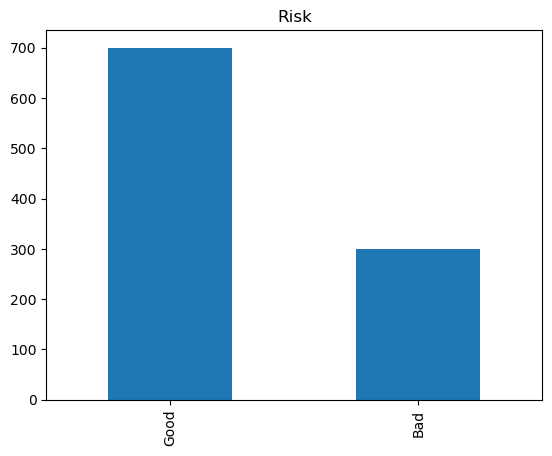

In [111]:
df_credit['Risk'].value_counts().plot(kind='bar', x='Category', y='Values', legend=False, title='Risk')

The dataset is slightly imbalanced in terms of Credit Risk, so the sampling for creating training and testing set should be done through stratified sampling.

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


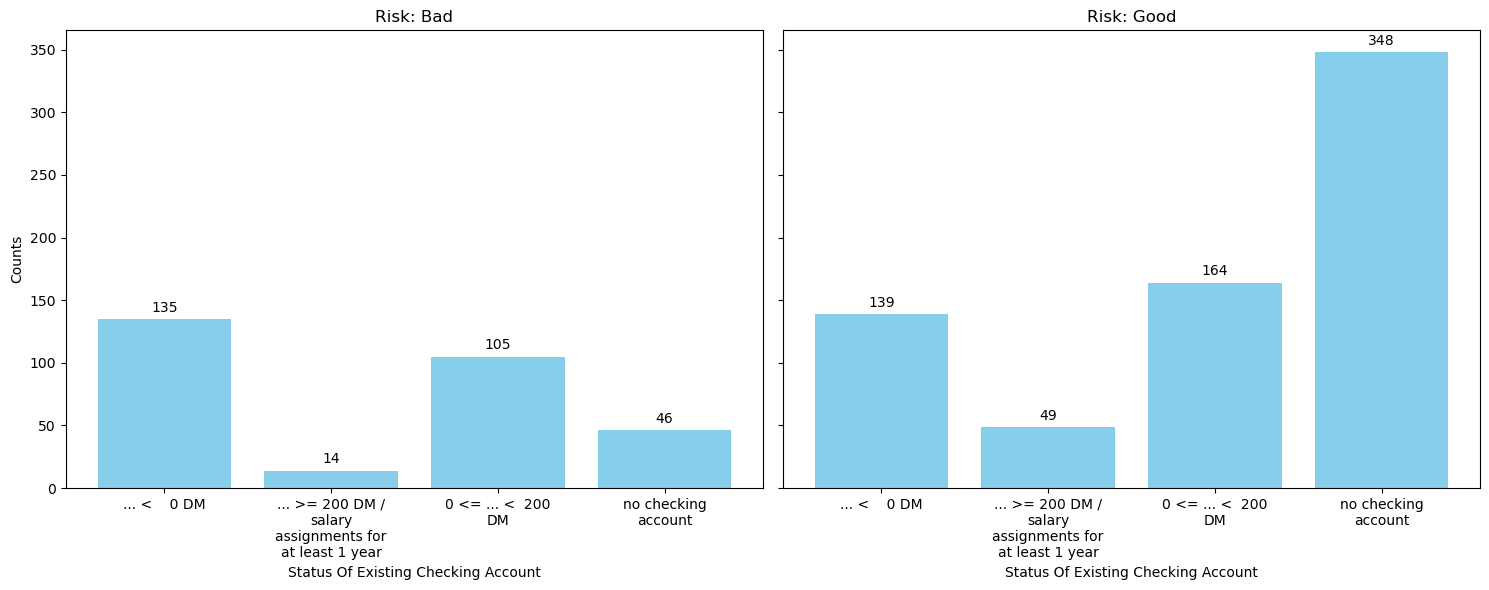

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


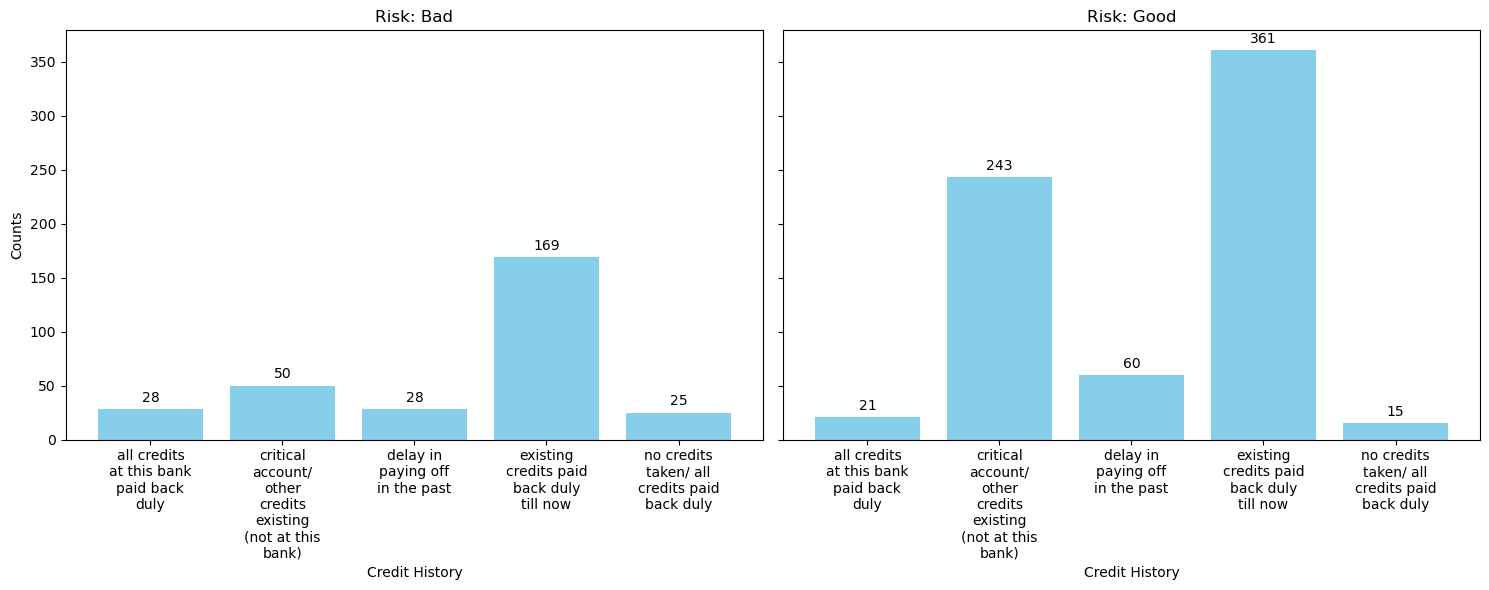

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


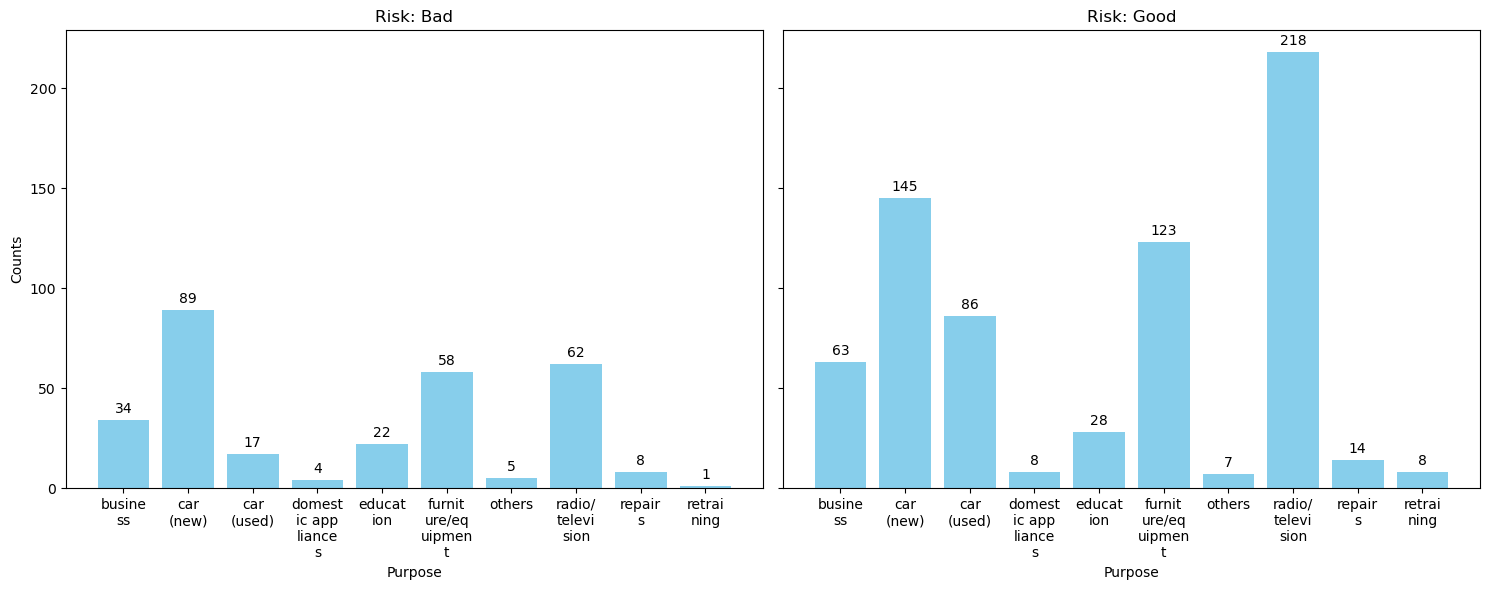

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


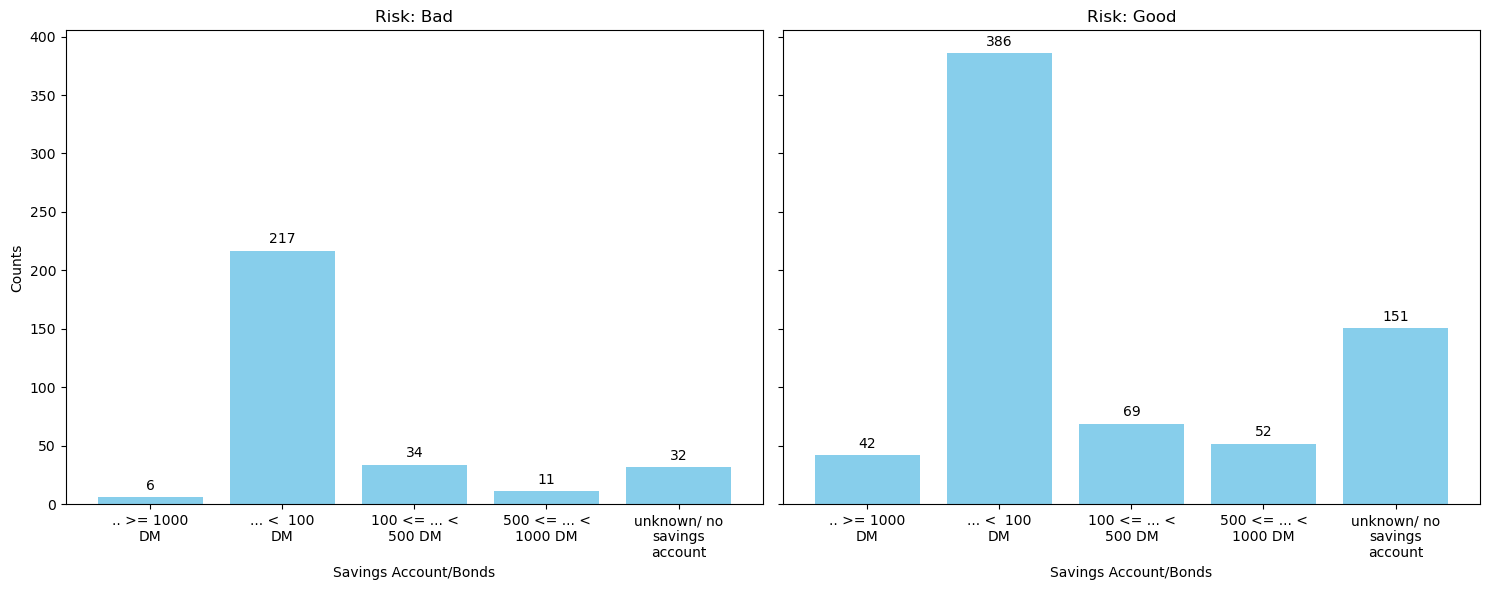

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


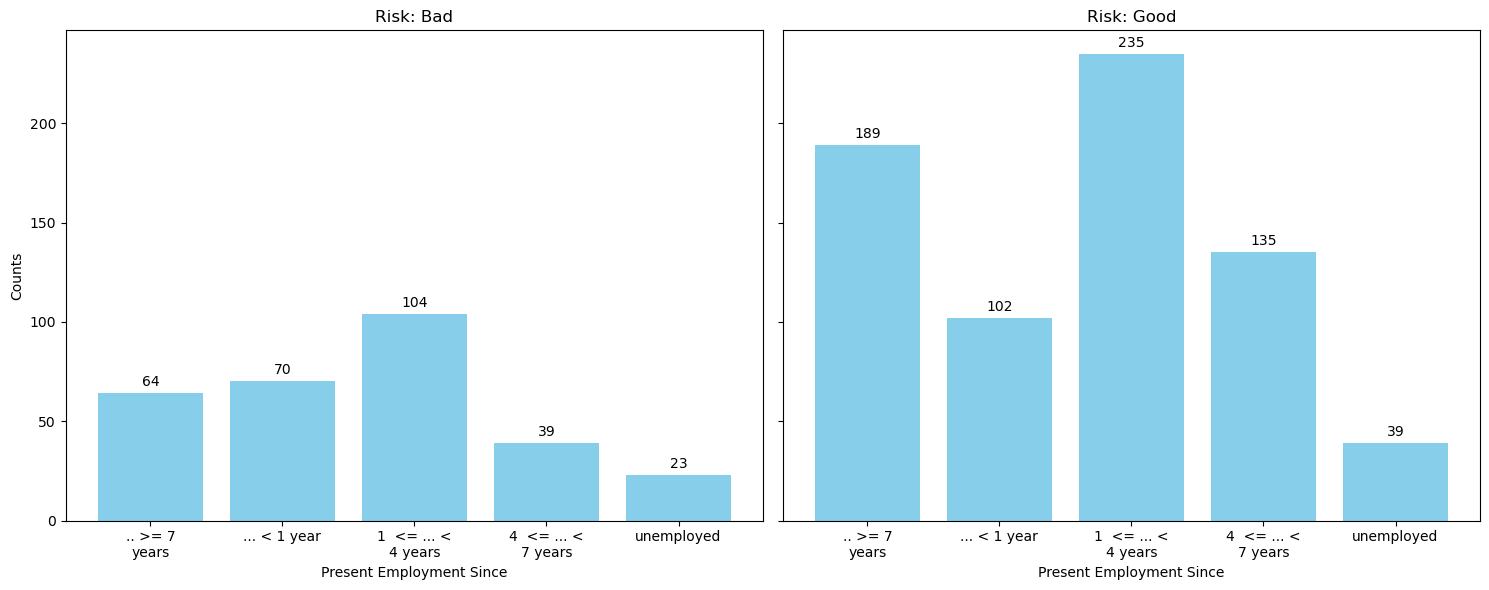

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


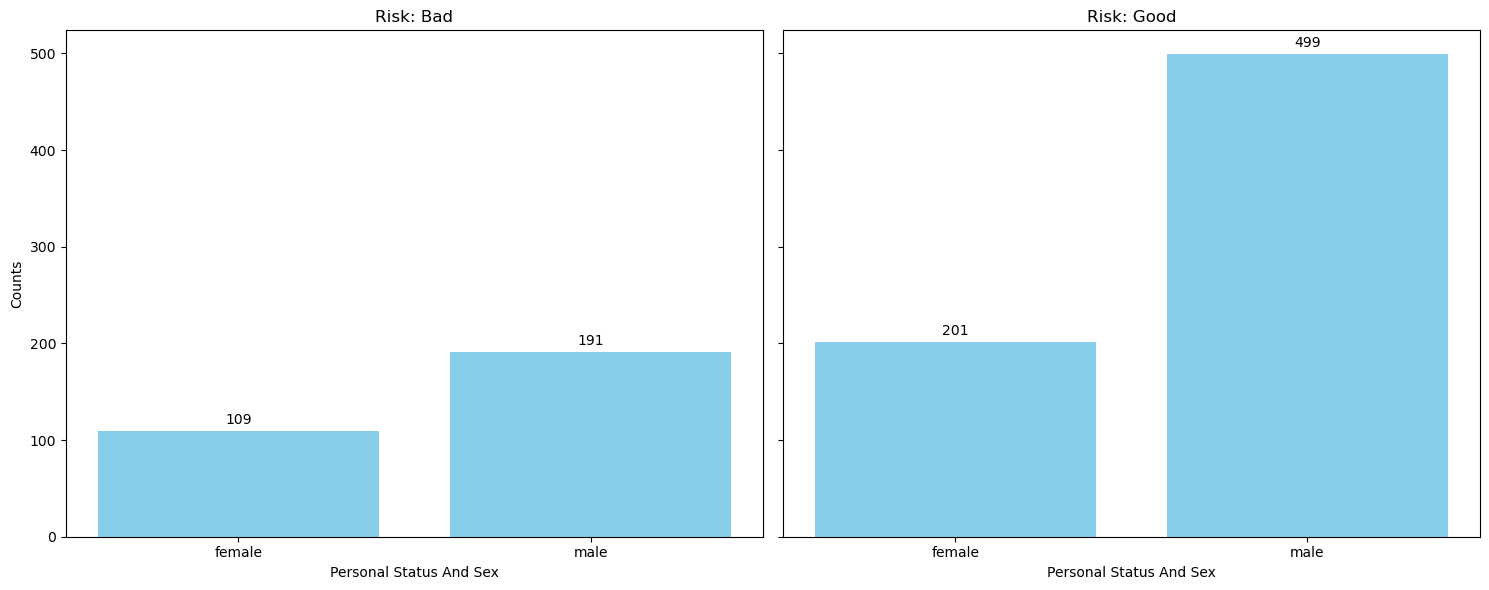

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


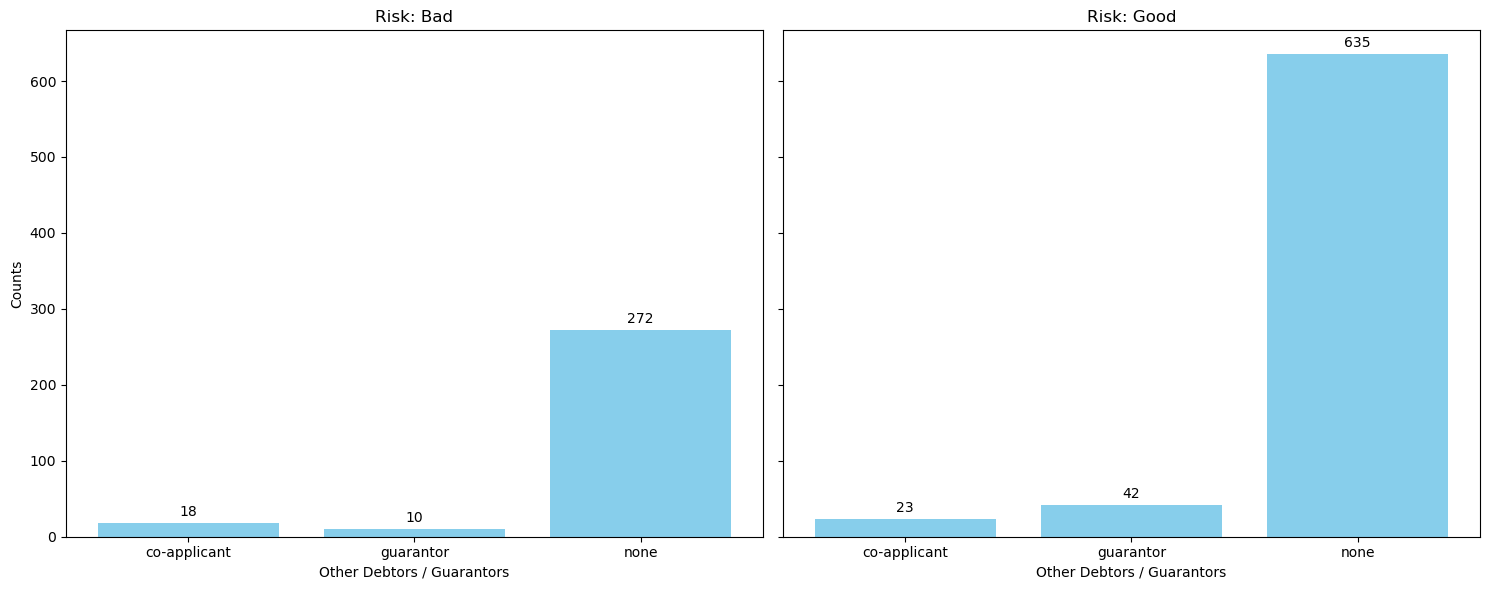

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


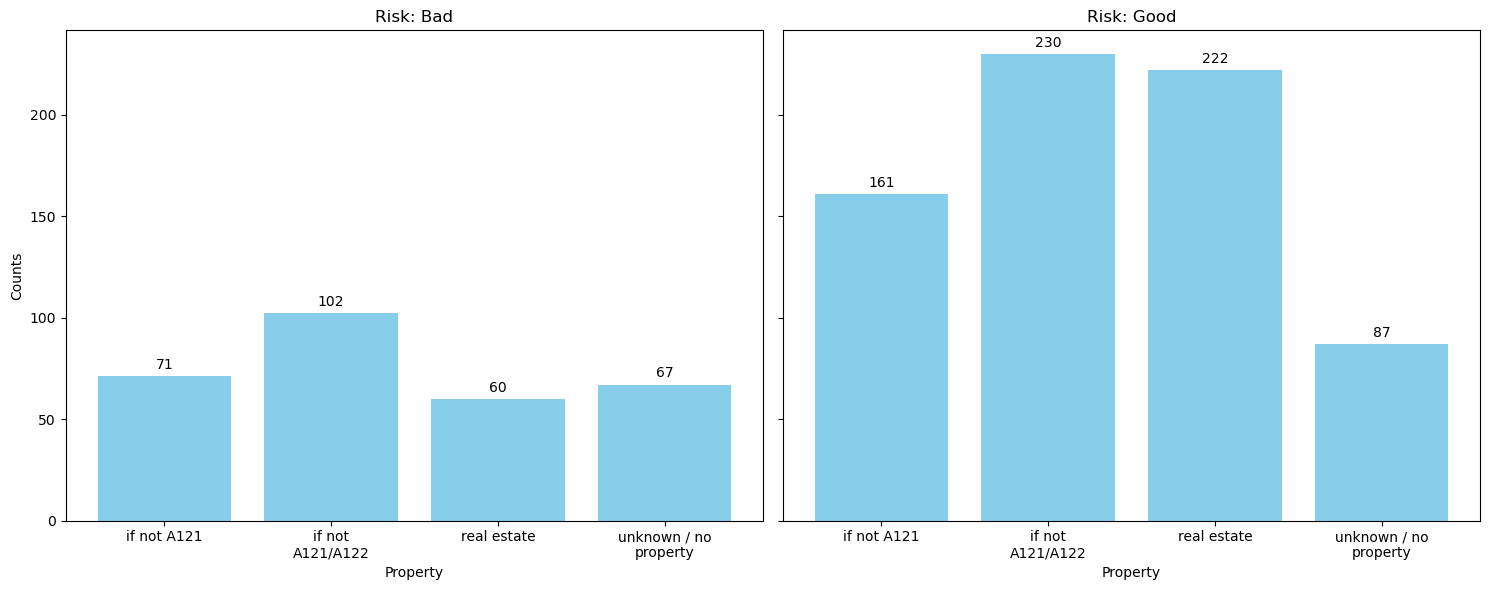

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


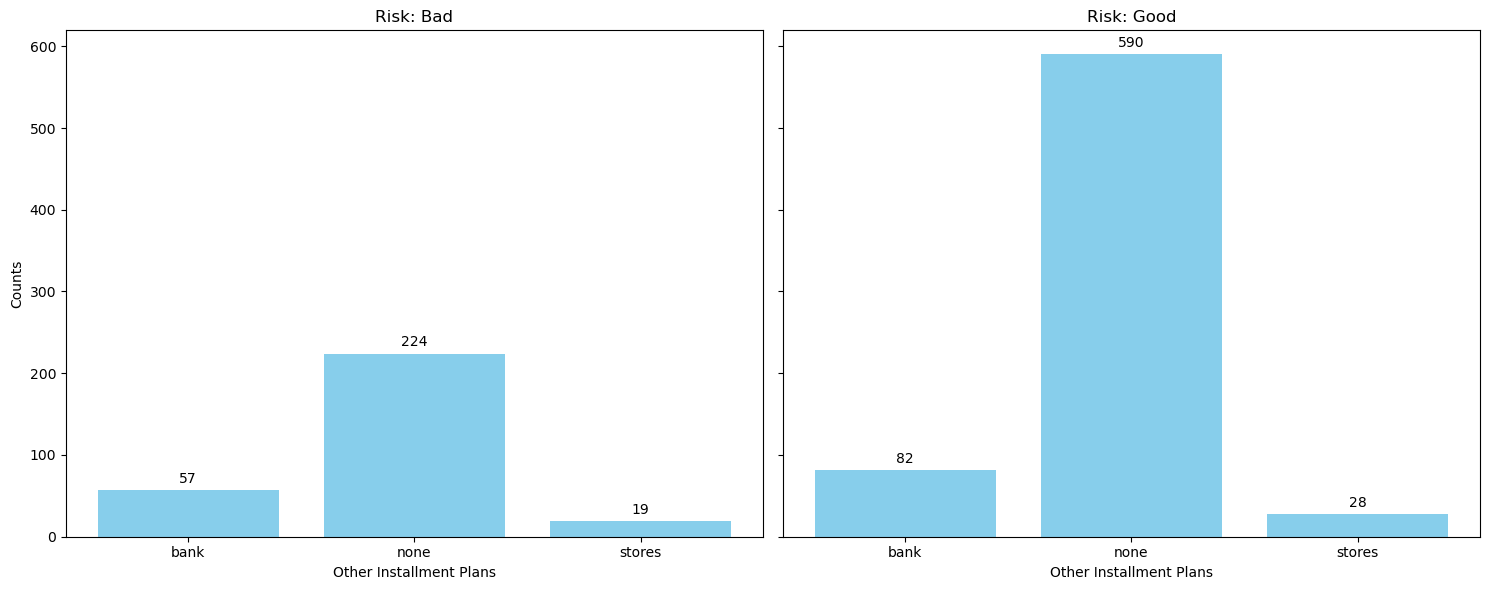

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


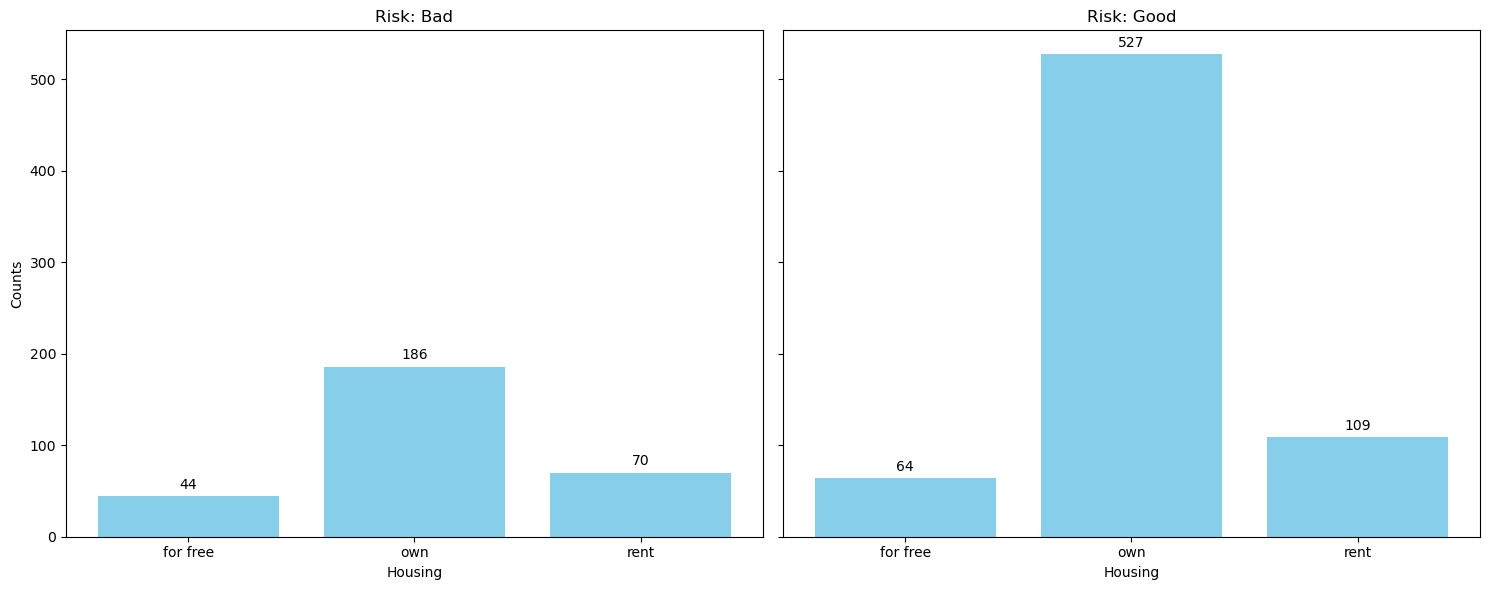

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


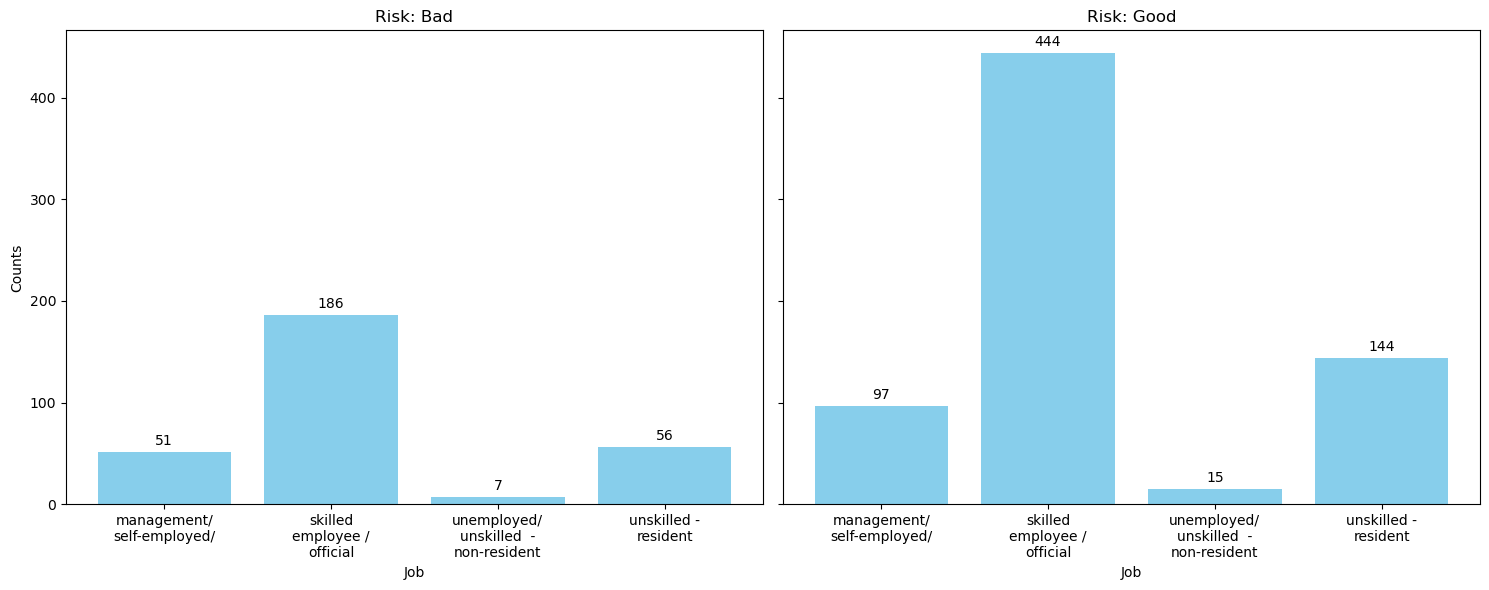

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


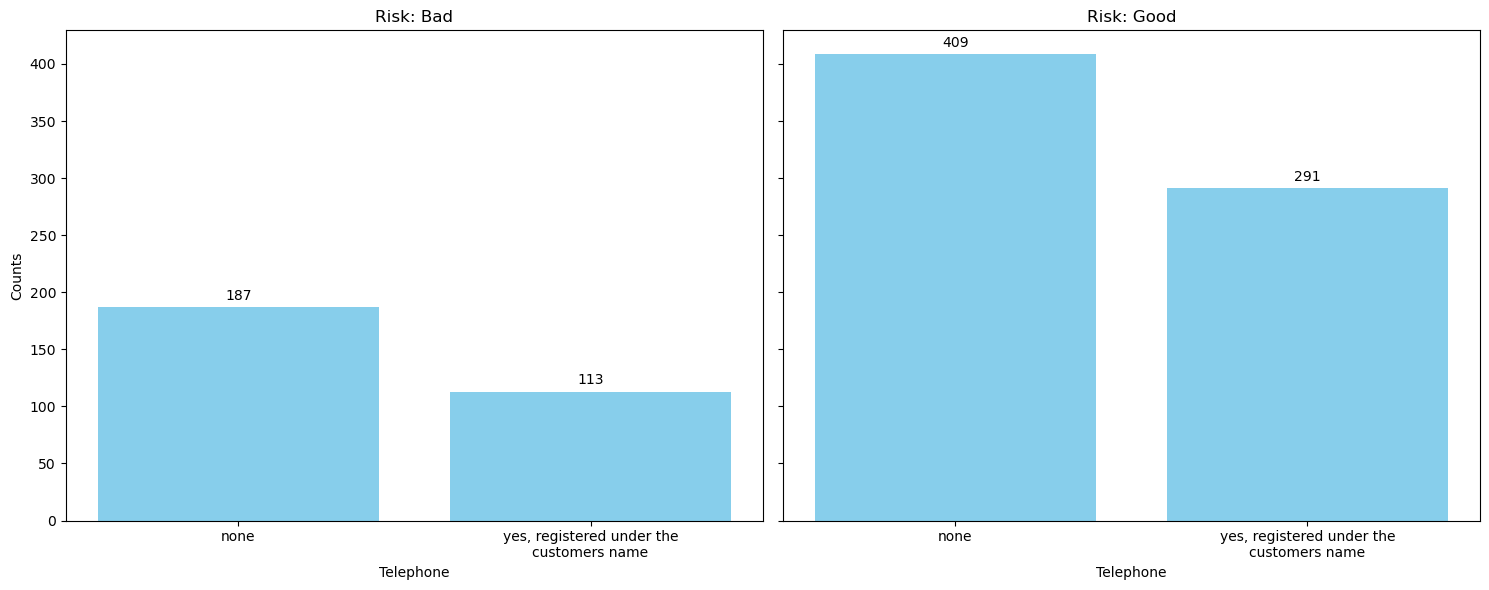

C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)
C:\Users\adaks\AppData\Local\Temp\ipykernel_12224\829043366.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(wrapped_labels)


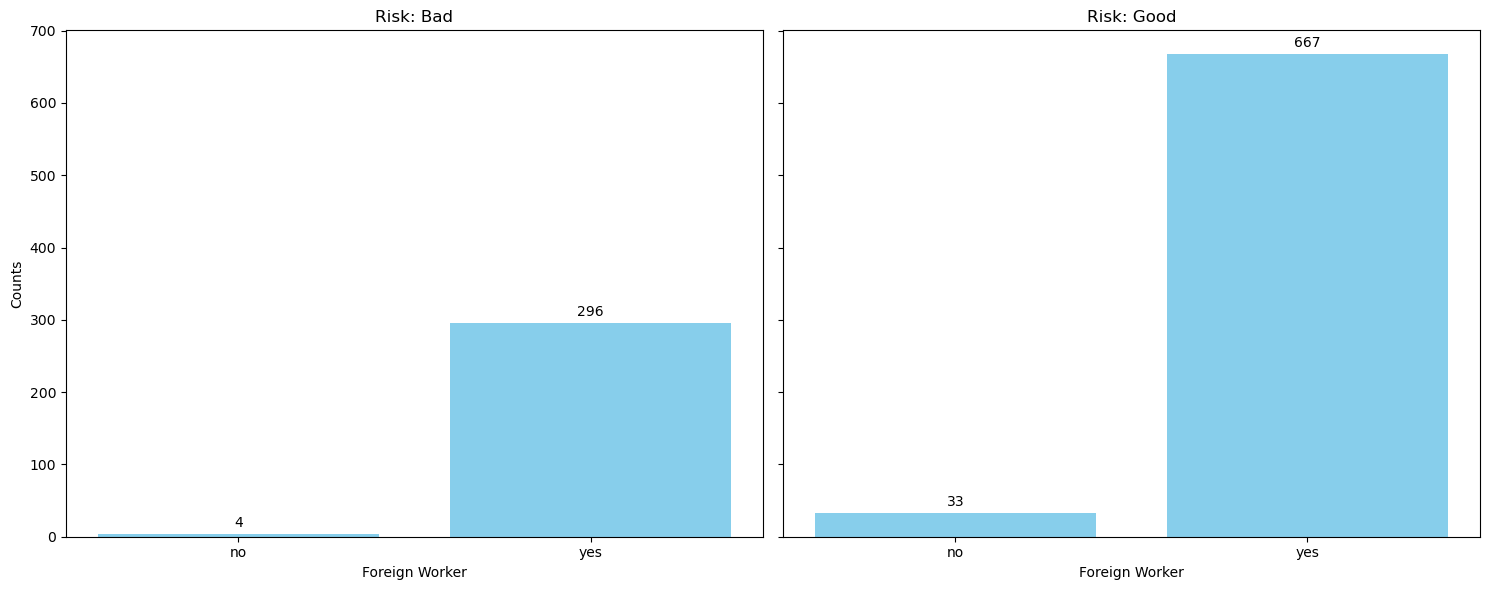

In [112]:
for j in category_cols:

    if j=='Risk':   continue

    # Create a cross-tabulation of the counts
    counts = pd.crosstab(df_credit[j], df_credit['Risk'])


    # Number of categories in Category2
    n_categories2 = len(counts.columns)


    
    fig, ax = plt.subplots(figsize=(7, 6))
    bar_width = 0.09 * fig.get_figwidth() / len(counts)
    plt.close(fig)

    # Create subplots
    fig, axs = plt.subplots(1, n_categories2, figsize=(15, 6), sharey=True)

    # Function to wrap text for x-tick labels
    def wrap_labels(labels, bar_width):
        wrapped_labels = []
        for label in labels:
            # Estimate the number of characters that fit in the bar width
            max_characters = int(bar_width * 100)  # Adjust multiplier as needed
            wrapped_labels.append(textwrap.fill(label, max_characters))
        return wrapped_labels

    # Function to add labels above bars
    def add_labels(ax, rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # Plot each category in its own subplot
    for i, category2 in enumerate(counts.columns):
        bars = axs[i].bar(counts.index, counts[category2], color='skyblue')
        axs[i].set_title(f'Risk: {category2}')
        axs[i].set_xlabel(j.title())
        if i == 0:  axs[i].set_ylabel('Counts')
        wrapped_labels = wrap_labels(counts.index, bar_width)
        axs[i].set_xticklabels(wrapped_labels)
        add_labels(axs[i], bars)

    # Adjust layout
    plt.tight_layout()
    plt.show()


**Major observations from categorical predictiors:**
1. Users with no checking account have a much higher chance to be under Good credit risk than Bad credit risk.
2. According to credit history, people with critical checking account/other credit existing in other places have higher chance to be a under Good credit risk compared to Bad credit risk.
3. Distribution of Purpose of loan looks similar for both Good and Bad credit risk groups, no significant underlying pattern can be observed.
4. In terms of presence of Savings Accounts / Bonds, no significant underlying pattern can be observed for Good and Bad credit risk.
5. People with present employment >7 years tend to be under Good risk than Bad risk.
6. No significant difference in the Risk distrbution between genders.
7. No significant difference in the Risk distrbution in terms of presence of other debtors / guarantors.
8. Real estate owners have a higher chance to be under Good credit risk than Bad credit risk.
9. No significant difference in the Risk distrbution in terms of presence of other installment plans.
10. House owners have a higher chance to be under Good credit risk than Bad credit risk.
11. Skilled employees / officials have a higher chance to be under Good credit risk than Bad credit risk.
12. No significant difference in the Risk distrbution in terms of presence of telephones.
13. No significant difference in the Risk distrbution in terms of being a foreign worker or not.

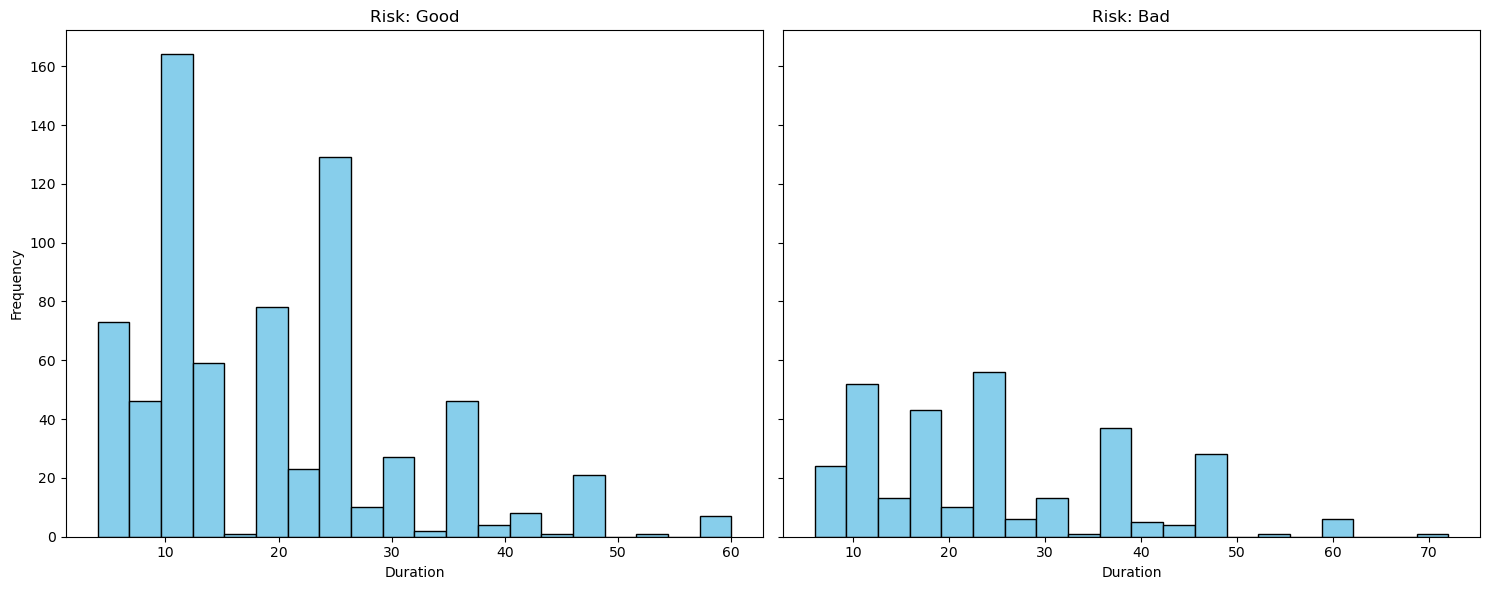

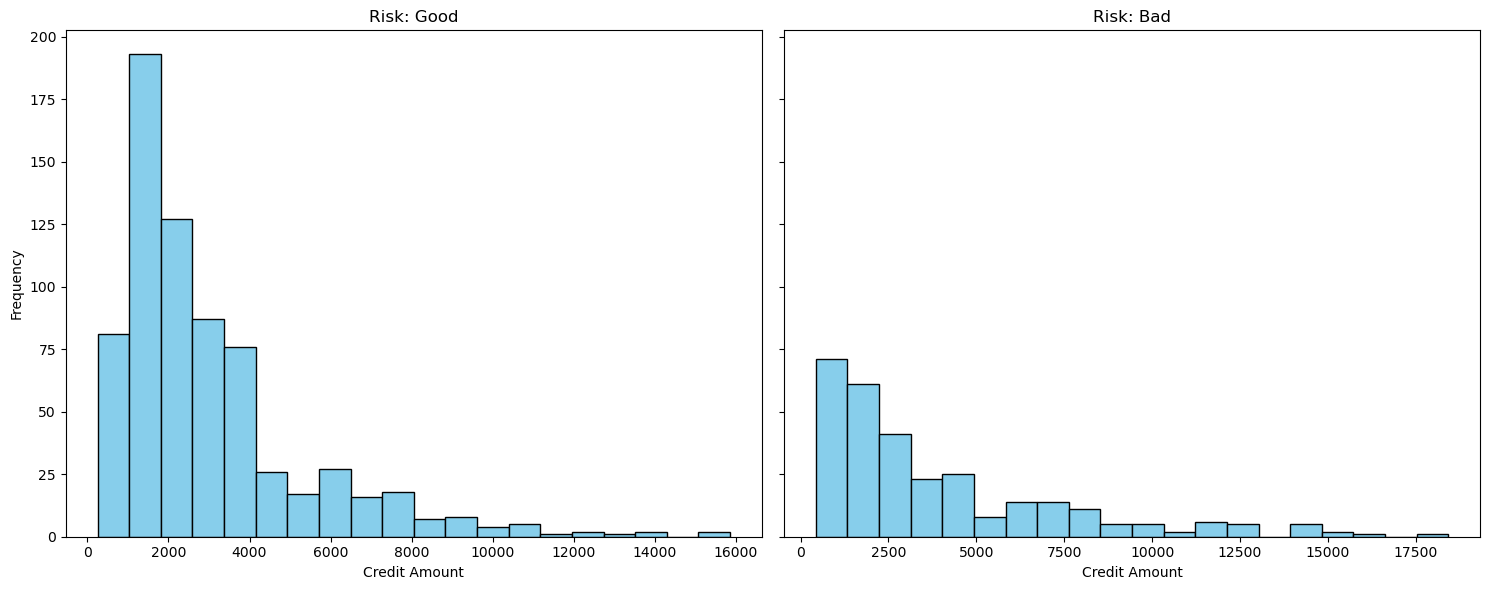

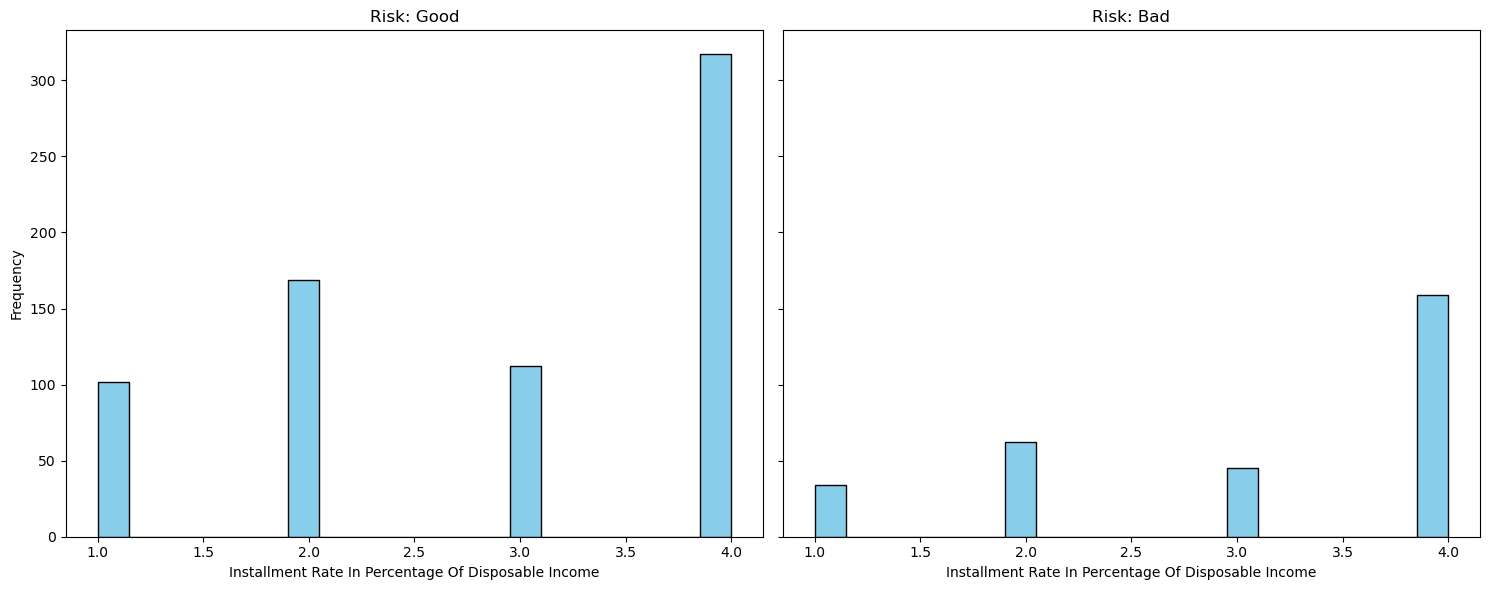

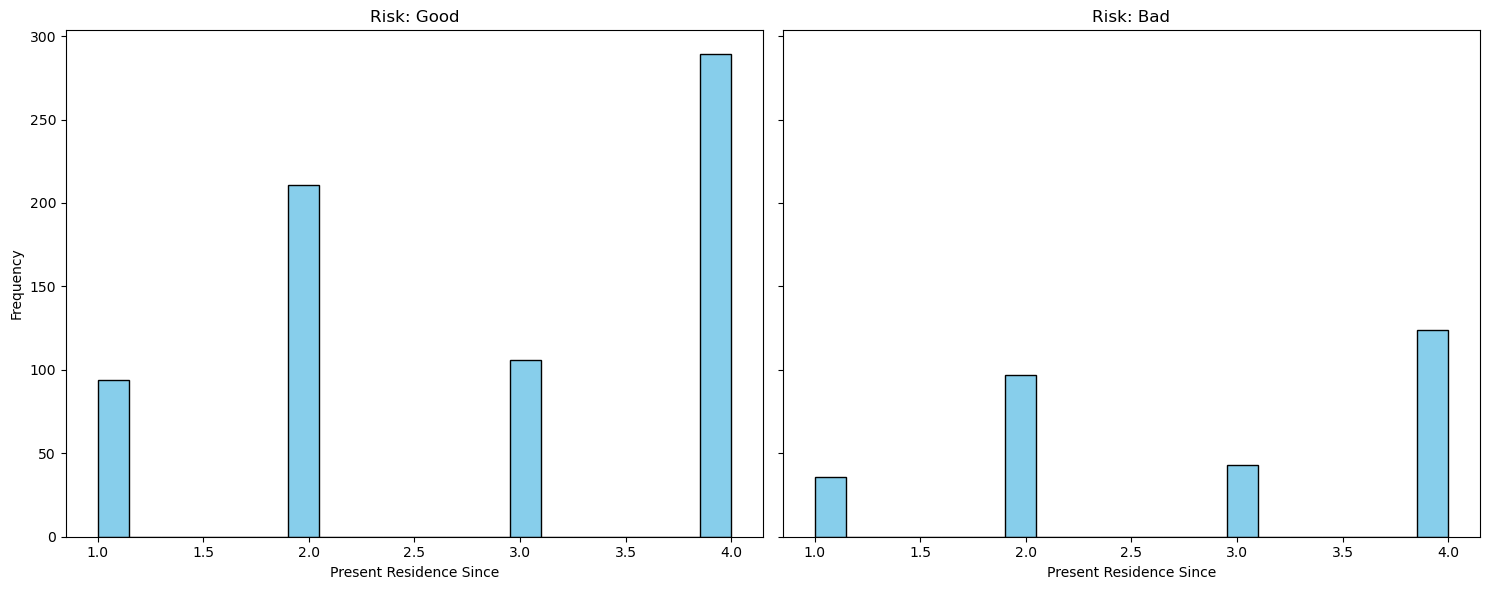

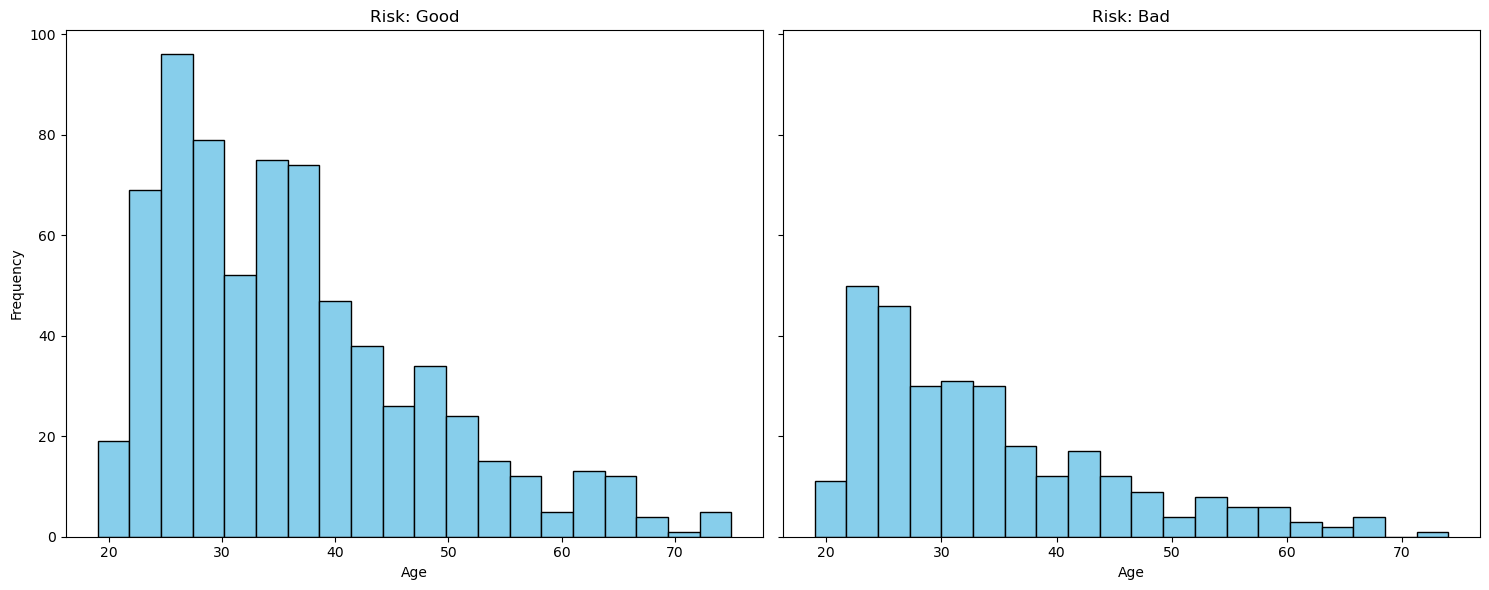

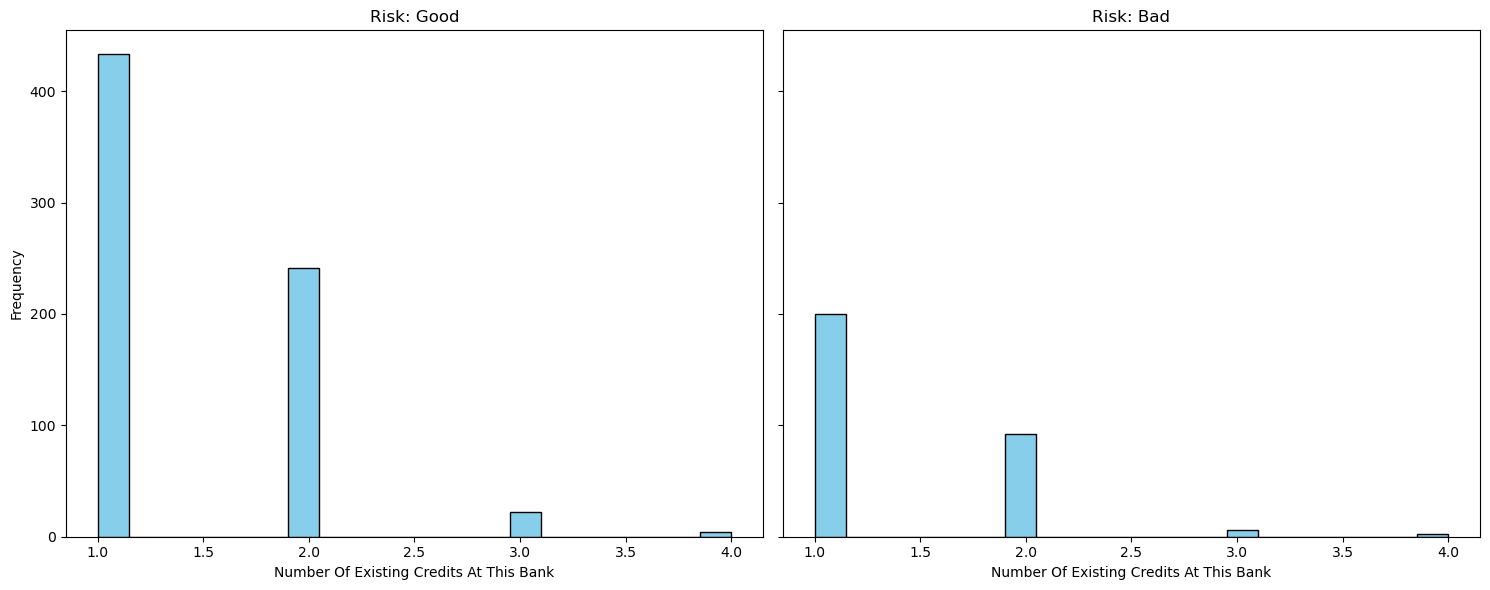

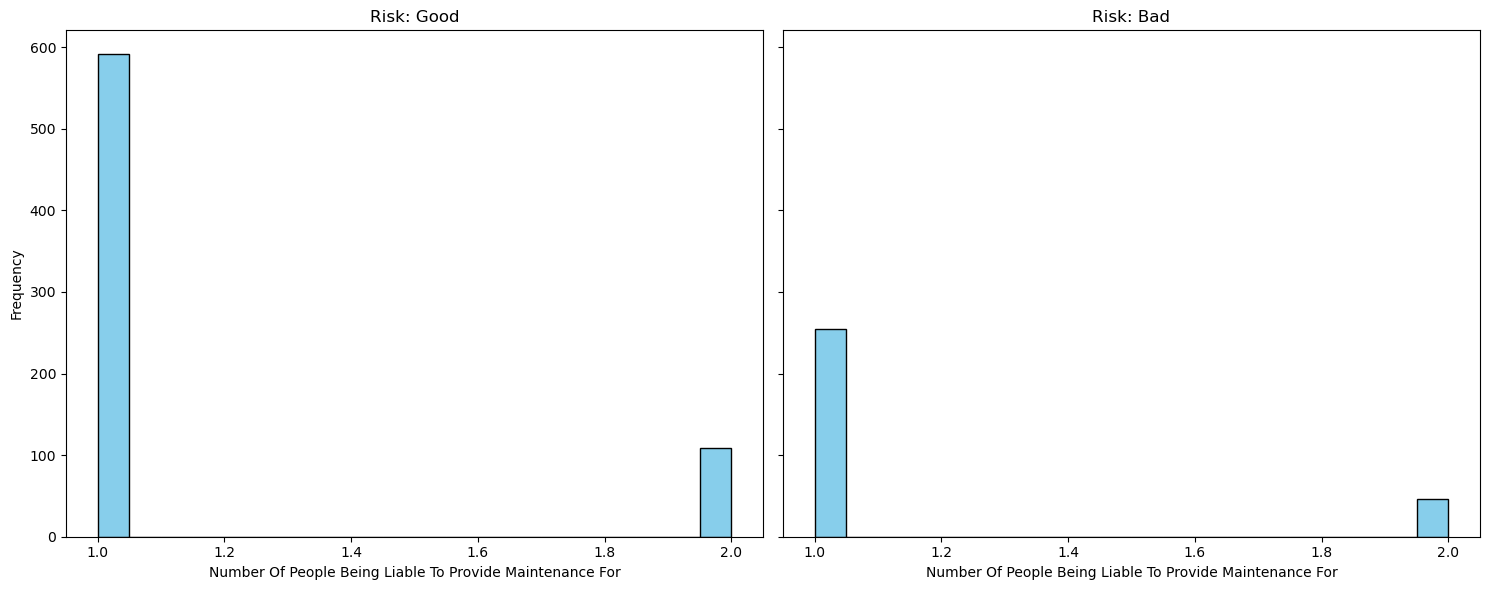

In [113]:

for j in numeric_cols:

    # Number of unique categories in Category2
    unique_categories = df_credit['Risk'].unique()

    # Create subplots
    fig, axs = plt.subplots(1, len(unique_categories), figsize=(15, 6), sharey=True)

    # Plot each category in its own subplot
    for i, category in enumerate(unique_categories):
        subset = df_credit[df_credit['Risk'] == category]
        axs[i].hist(subset[j], bins=20, color='skyblue', edgecolor='black')
        axs[i].set_title(f'Risk: {category}')
        axs[i].set_xlabel(j.title())
        if i == 0:  axs[i].set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()
    plt.show()


**Major observations from numeric predictiors:**
1. No significant difference in the distrbution of Credit Duration between Good and Bad credit risks.
2. No significant difference in the distrbution of Credit Amount between Good and Bad credit risks.
3. No significant difference in the distrbution of Installment rate in percentage of disposable income between Good and Bad credit risks.
4. No significant difference in the distrbution of time of Present Residence between Good and Bad credit risks.
5. No significant difference in the distrbution of Age between Good and Bad credit risks.
6. No significant difference in the distrbution of Number of existing credits at this bank between Good and Bad credit risks.
7. No significant difference in the distrbution of Number of people being liable to provide maintenance for between Good and Bad credit risks.


# Correlation Analysis

Before fitting the dataset into any model, a check should be carried out to find if any of the predictors are highly correlated with any other. There are multiple reasons to check for correlation:
1. Multicollinearity: Multicollinearity can lead to inflated standard errors for the coefficient estimates, making it difficult to determine the individual effect of each predictor variable. This can result in unreliable and unstable estimates of regression coefficients.
2. Interpretability: Highly correlated variables can complicate the interpretation of the model. It becomes challenging to disentangle the individual effects of correlated predictors on the response variable.
3. Model Simplification: By identifying and removing highly correlated variables, you can simplify the model without losing much explanatory power. This can improve the model's generalizability and reduce overfitting.

*To check for correlation between the object predictors, an association analysis is performed with the Chi-Square test for independence. A low p-value will be concluded as presence of significant association.*

In [114]:
chi_test = pd.DataFrame(columns= ['Predictor 1', 'Predictor 2', 'Chi-square Statistic', 'p-value', 'Inference'])

for vars in itertools.combinations([j for j in category_cols if j!='Risk'],2):

    # Create a contingency table
    contingency_table = pd.crosstab(df_credit[vars[0]], df_credit[vars[1]])

    # Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    row = [vars[0], vars[1], chi2, p] 

    # Interpretation
    alpha = 0.05
    if p < alpha:   row.append("Significant Association")
    else:   row.append("No Significant Association")

    chi_test.loc[len(chi_test)] = row

display(chi_test[chi_test['Inference']=='Significant Association'])
print('Number of Predictors with significant associations with each other:', max(chi_test[chi_test['Inference']=='Significant Association']['Predictor 1'].nunique(),
                                                                                 chi_test[chi_test['Inference']=='Significant Association']['Predictor 2'].nunique()))

,Predictor 1,Predictor 2,Chi-square Statistic,p-value,Inference
0,Status of existing checking account,Credit history,60.332138,1.963473e-08,Significant Association
1,Status of existing checking account,Purpose,66.799247,3.170885e-05,Significant Association
2,Status of existing checking account,Savings account/bonds,92.473281,1.636530e-14,Significant Association
3,Status of existing checking account,Present employment since,27.256501,7.096060e-03,Significant Association
5,Status of existing checking account,Other debtors / guarantors,23.558284,6.295183e-04,Significant Association
6,Status of existing checking account,Property,17.220340,4.537523e-02,Significant Association
8,Status of existing checking account,Housing,19.470119,3.439130e-03,Significant Association
9,Status of existing checking account,Job,16.956901,4.939520e-02,Significant Association
12,Credit history,Purpose,111.700730,1.111611e-09,Significant Association
14,Credit history,Present employment since,40.574414,6.414773e-04,Significant Association


Number of Predictors with significant associations with each other: 12


Major observation from Association Analysis of categorical predictors is that, 12 of the 13 predictors are significantly correlated with each other. This makes a lot of sense, since most of the financial parameters of the population are correlated with each other, and this indicates the financial and social status of every person. Thus, it is advisable none of the categorical predictors are rejected, and all of them should be used for setting up the model.

*To check for correlation between the numeric predictors, a correlation heatmap is plotted.*

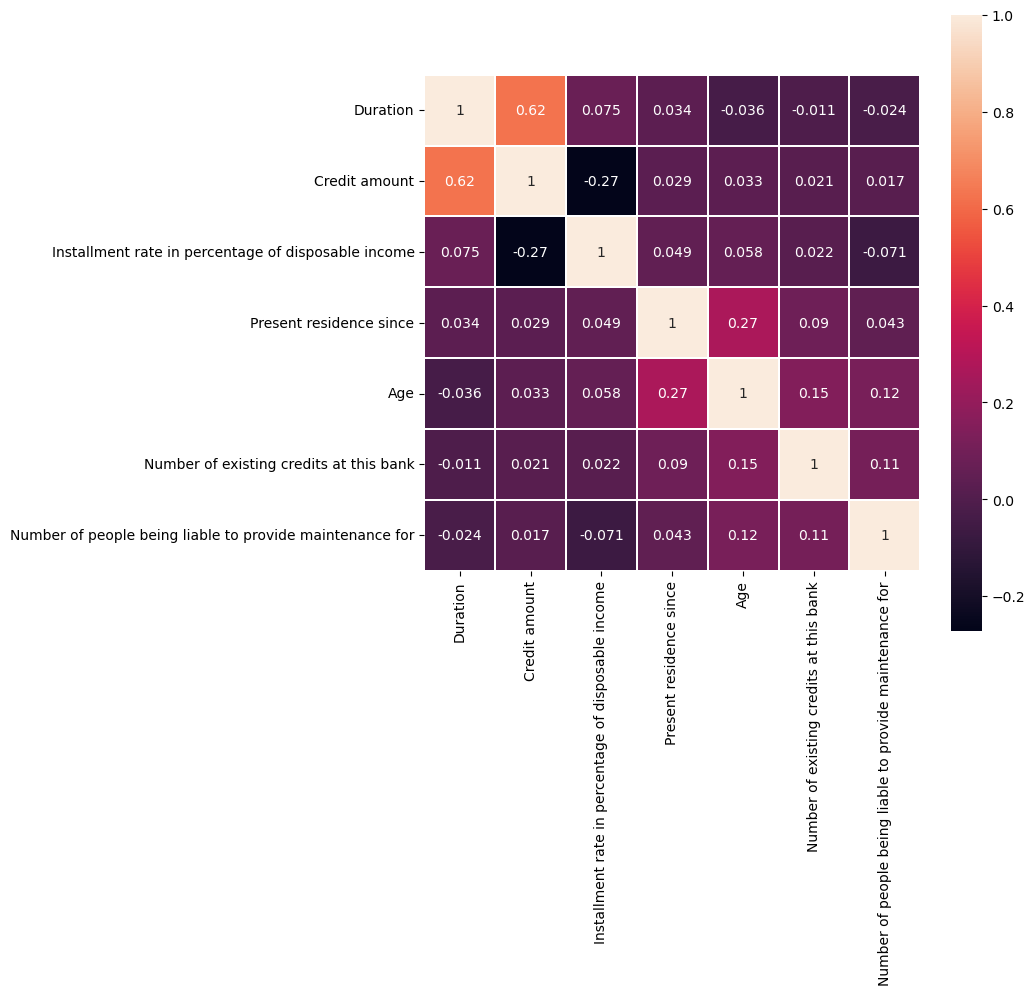

In [115]:
plt.figure(figsize=(8,8))
sns.heatmap(df_credit[numeric_cols].astype(float).corr(), linewidths=0.1, vmax=1.0, square=True,  linecolor='white', annot=True)
plt.show()

Major observation from the correlation heatmap of numeric predictors is that, none of the predictors are highly correlated with each other. So all of the 7 numeric predictors should go into fitting an ideal model.

# Feature Engineering

**Feature Engineering in this dataset involves 2 steps:**
- One-hot-encoding: Convert categorical predictors into multiple dummy variables
- Transformation/Scaling of numeric predictors with high range and skewness

In [116]:
# One-hot-encoding
df_dummy = pd.DataFrame()
for j in category_cols: 
    if j!='Risk':   df_dummy = pd.concat([df_dummy,pd.get_dummies(df_credit[j], drop_first=True, prefix=j)], axis=1)

# Log transofmation of Credit Amount, since it highly right-skewed
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

# Assign binary values to Risk, Bad=1 & Good=0
df_credit['Risk'] = df_credit['Risk'].replace({'Bad':1, 'Good':0})

# Creating final dataset for model fitting
df_final = pd.concat([df_dummy, df_credit[numeric_cols], df_credit[['Risk']]], axis=1)

# Train Test Split

In [117]:
#Creating the X and y variables
X = df_final.drop(columns=['Risk'])
y = df_final["Risk"]

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)
# using stratify=y preserves class distribution of Risk and prevents bias

# Modelling: Decision Tree

**Fitting Decision Tree using default hyperparameters:**

In [125]:

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.68
Precision: 0.48
Recall: 0.52
F1 Score: 0.50
Confusion Matrix:
[[132  43]
 [ 36  39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       175
           1       0.48      0.52      0.50        75

    accuracy                           0.68       250
   macro avg       0.63      0.64      0.63       250
weighted avg       0.69      0.68      0.69       250



**Fitting Decision Tree with the best hyperparameters obtained from GridSearchCV**

In [126]:
# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],  # Measure for split quality
    'splitter': ['best', 'random'],  # Strategy used to split at each node
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

# Evaluate the model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 15, 'splitter': 'random'}
Best Cross-Validation Score: 0.732
Test Accuracy: 0.644
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       175
           1       0.33      0.19      0.24        75

    accuracy                           0.64       250
   macro avg       0.52      0.51      0.50       250
weighted avg       0.59      0.64      0.61       250



c:\Users\adaks\anaconda3\envs\geo_env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


An accuracy of 64% is obtained. Thus Decision Tree, even with best hyperparameters, is not performing good, when it is trying to predict Bad and Good credit.  
The weighted average of recall of 64%, which means there is moderate chance of False Negatives i.e. misclassification of Bad credit persons as Good credit persons.  
The weighted average of precisiom of 59%, which means there is high chance of False Positives i.e. misclassification of Good credit persons as Bad credit persons.  
The weighted average of f1-score of 61%, which means the model is giving only 61% good predictions after tackling the imbalance in the training data.

# Modelling: Logistic Regression

In [118]:
# Add a constant term for the intercept
X_train_c = sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train_c)
result = model.fit()

display(result.summary())

Optimization terminated successfully.
         Current function value: 0.452300
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  750
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                           46
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.2596
Time:                        05:58:32   Log-Likelihood:                -339.23
converged:                       True   LL-Null:                       -458.15
Covariance Type:            nonrobust   LLR p-value:                 1.110e-27
==============================================================================================================================================================
                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                         -5.6500      2.256     -2.505      0.012     -10.071      -1.229
Status of existing checking account_... >= 200 DM / salary assignments for at least 1 year    -0.8514      0.415     -2.052      0.040      -1.665      -0.038
Status of existing checking account_0 <= ... <  200 DM                                        -0.3283      0.252     -1.303      0.192      -0.822       0.165
Status of existing checking account_no checking account                                       -1.6638      0.271     -6.145      0.000      -2.194      -1.133
Credit history_critical account/  other credits existing (not at this bank)                   -1.2122      0.485     -2.499      0.012      -2.163      -0.261
Credit history_delay in paying off in the past                                                -0.3802      0.526     -0.723      0.470      -1.411       0.651
Credit history_existing credits paid back duly till now                                       -0.2955      0.422     -0.700      0.484      -1.122       0.532
Credit history_no credits taken/ all credits paid back duly                                    0.2883      0.607      0.475      0.635      -0.902       1.479
Purpose_car (new)                                                                              0.4785      0.376      1.273      0.203      -0.258       1.215
Purpose_car (used)                                                                            -0.7197      0.488     -1.476      0.140      -1.676       0.236
Purpose_domestic appliances                                                                   -0.1484      0.930     -0.159      0.873      -1.972       1.675
Purpose_education                                                                              1.2569      0.540      2.326      0.020       0.198       2.316
Purpose_furniture/equipment                                                                   -0.0313      0.403     -0.078      0.938      -0.821       0.759
Purpose_others                                                                                -1.0724      1.081     -0.992      0.321      -3.191       1.046
Purpose_radio/television                                                                      -0.1602      0.380     -0.422      0.673      -0.905       0.584
Purpose_repairs                                                                                0.6178      0.694      0.890      0.373      -0.743       1.978
Purpose_retraining                                                                            -0.6467      1.290     -0.502      0.616      -3.174       1.881
Savings account/bonds_... <  100 DM                          

**Observation**

Gender has high p-value.  
All the variables of Other debtors / gurantors have high p-values.  
All the variables of Job have high p-values.  
Presence of telephones has high p-value.  
Being a foreign worker has high p-value.  
Credit amount has high p-value.  
Duration of present residence has high p-value.  
Age has high p-value.  
Number of existing credits at this bank has high p-value.  
Number of people being liable to provide maintenance for has high p-value.  

**10 out of 20 predictors have very low significance in predicting Credit Risk.**  
Time to refit the model using the remaining 8 predictors.

In [119]:
significant_predictors = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 'Present employment since'
                          'Property', 'Other installment plans', 'Housing', 'Duration', 'Installment rate in percentage of disposable income']

# Recreating predictor dataset from the significant variables
X_train_1 = X_train[[col for col in X_train.columns if any(col.startswith(prefix) for prefix in significant_predictors)]]
X_test_1 = X_test[[col for col in X_train.columns if any(col.startswith(prefix) for prefix in significant_predictors)]]

# Add a constant term for the intercept
X_train_1c = sm.add_constant(X_train_1)
X_test_1c = sm.add_constant(X_test_1)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train_1c)
result = model.fit()

display(result.summary())

Optimization terminated successfully.
         Current function value: 0.474276
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  750
Model:                          Logit   Df Residuals:                      723
Method:                           MLE   Df Model:                           26
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.2236
Time:                        05:58:32   Log-Likelihood:                -355.71
converged:                       True   LL-Null:                       -458.15
Covariance Type:            nonrobust   LLR p-value:                 1.021e-29
==============================================================================================================================================================
                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                         -1.8923      0.869     -2.177      0.029      -3.596      -0.189
Status of existing checking account_... >= 200 DM / salary assignments for at least 1 year    -0.7516      0.399     -1.882      0.060      -1.534       0.031
Status of existing checking account_0 <= ... <  200 DM                                        -0.2467      0.235     -1.049      0.294      -0.708       0.214
Status of existing checking account_no checking account                                       -1.5926      0.258     -6.166      0.000      -2.099      -1.086
Credit history_critical account/  other credits existing (not at this bank)                   -1.1340      0.436     -2.599      0.009      -1.989      -0.279
Credit history_delay in paying off in the past                                                -0.3497      0.487     -0.718      0.473      -1.305       0.605
Credit history_existing credits paid back duly till now                                       -0.3654      0.405     -0.901      0.367      -1.160       0.429
Credit history_no credits taken/ all credits paid back duly                                    0.5001      0.562      0.890      0.374      -0.602       1.602
Purpose_car (new)                                                                              0.5542      0.360      1.538      0.124      -0.152       1.261
Purpose_car (used)                                                                            -0.4942      0.460     -1.075      0.282      -1.395       0.406
Purpose_domestic appliances                                                                    0.2092      0.861      0.243      0.808      -1.478       1.897
Purpose_education                                                                              1.5441      0.513      3.008      0.003       0.538       2.550
Purpose_furniture/equipment                                                                    0.2090      0.378      0.552      0.581      -0.532       0.950
Purpose_others                                                                                -0.8839      1.047     -0.845      0.398      -2.935       1.167
Purpose_radio/television                                                                      -0.0714      0.361     -0.198      0.843      -0.779       0.636
Purpose_repairs                                                                                0.8662      0.636      1.361      0.174      -0.381       2.114
Purpose_retraining                                                                            -0.9570      1.275     -0.750      0.453      -3.456       1.542
Savings account/bonds_... <  100 DM                          

**Finding best threshold with ROC-AUC curve, Youden's J statistic, Closest Point to Top-Left Corner**

Best Threshold (Youden's J): 0.2846066004523973
Best Threshold (Top-Left): 0.2846066004523973


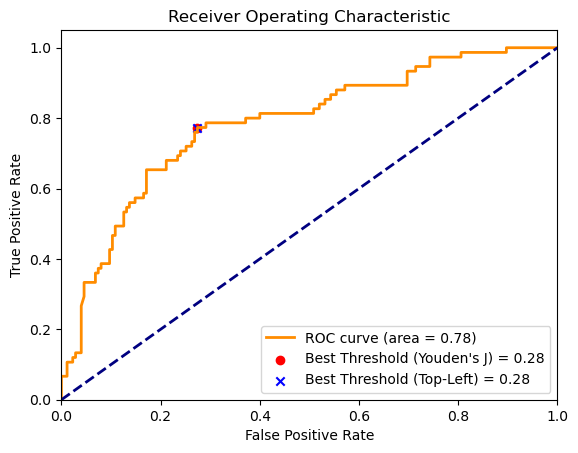

In [120]:
# Predict in test dataset
y_pred_prob = result.predict(X_test_1c)

# Calculate ROC, AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


j_scores = tpr - fpr
best_threshold_index = np.argmax(j_scores)
best_threshold_youden = thresholds[best_threshold_index]
print(f'Best Threshold (Youden\'s J): {best_threshold_youden}')



distances = np.sqrt((1 - tpr)**2 + fpr**2)
best_threshold_index = np.argmin(distances)
best_threshold_top_left = thresholds[best_threshold_index]
print(f'Best Threshold (Top-Left): {best_threshold_top_left}')


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', marker='o', label=f'Best Threshold (Youden\'s J) = {best_threshold_youden:.2f}')
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='blue', marker='x', label=f'Best Threshold (Top-Left) = {best_threshold_top_left:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



Best probability threshold is 0.2846066004523973 according to both Youden's J statistic and Closest to Top-Left point. Calculating validation metrics based on best probability threshold:

In [121]:
y_pred = (y_pred_prob >= best_threshold_top_left).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.74
Precision: 0.55
Recall: 0.77
F1 Score: 0.64
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       175
           1       0.55      0.77      0.64        75

    accuracy                           0.74       250
   macro avg       0.71      0.75      0.72       250
weighted avg       0.78      0.74      0.75       250



An accuracy of 74% is obtained. Thus Logistic Regression with the best probability threshold is performing good, when it is trying to predict Bad and Good credit.  
The weighted average of recall of 74%, which reduces the chance of False Negatives i.e. misclassification of Bad credit persons as Good credit persons.  
The weighted average of precisiom of 78%, which reduces the chance of False Positives i.e. misclassification of Good credit persons as Bad credit persons.  
The weighted average of f1-score of 75%, which means the model is giving 75% good predictions in spite of imbalance in the training data.

# Conclusion  

In this project, we explored and compared the performance of Logistic Regression and Decision Tree models for our specific classification task. Through rigorous evaluation and significance analysis and hyperparameter tuning, it was found that the Logistic Regression model outperformed the Decision Tree model. Logistic Regression demonstrated better accuracy, precision, recall, and F1 scores, indicating its superior ability to generalize well on unseen data. 

**Suggestions for Future Work:**  
- *Model Evaluation*: Consider evaluating other classification algorithms, such as Support Vector Machines (SVM) or ensemble methods like Random Forests and Gradient Boosting, to determine if they offer any improvements over the current models.
- *Hyperparameter Tuning*: Perform an extensive search for hyperparameters for both Logistic Regression and Decision Trees to potentially enhance their performance. Techniques such as Grid Search or Random Search could be applied for this purpose.
- *Cross-Validation*: Implement cross-validation to ensure that the results are robust and not specific to the particular train-test split. This can provide a more reliable estimate of model performance.
- *Handling Imbalanced Data*: If the dataset is imbalanced, consider techniques such as oversampling, undersampling, or using class weights to address potential biases in model performance.